<a href="https://colab.research.google.com/github/r4coder/DA/blob/main/DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Merging database-style dataframes**

In [ ]:
# https://github.com/r4coder/DA/blob/main/DA.ipynb
#Loading the dataset
import pandas as pd
import numpy as np
data_frame=pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/indo_rct.csv")
print(data_frame)

     rownames    id    site  age  risk    gender outcome    sod    pep  \
0           1  1001    1_UM   26   2.0  1_female   1_yes  1_yes   0_no   
1           2  1002    1_UM   24   1.0    2_male    0_no   0_no  1_yes   
2           3  1003    1_UM   57   1.0  1_female    0_no  1_yes   0_no   
3           4  1004    1_UM   29   2.0  1_female   1_yes  1_yes   0_no   
4           5  1005    1_UM   38   3.5  1_female    0_no  1_yes  1_yes   
..        ...   ...     ...  ...   ...       ...     ...    ...    ...   
597       598  3021    3_UK   39   2.0  1_female    0_no   0_no   0_no   
598       599  3022    3_UK   50   2.5  1_female    0_no  1_yes   0_no   
599       600  4001  4_Case   29   1.5  1_female    0_no   0_no   0_no   
600       601  4002  4_Case   40   1.5  1_female    0_no  1_yes   0_no   
601       602  4003  4_Case   73   2.0  1_female    0_no   0_no   0_no   

    recpanc  ... sodsom bsphinc bstent  chole pbmal  train        status  \
0     1_yes  ...   0_no    0_no   0

In [ ]:
#Making data set-1 from data set
data_1=data_frame[['id','age']]
print(data_1)

       id  age
0    1001   26
1    1002   24
2    1003   57
3    1004   29
4    1005   38
..    ...  ...
597  3021   39
598  3022   50
599  4001   29
600  4002   40
601  4003   73

[602 rows x 2 columns]


In [ ]:
#Making data set-2 from data set
data_2=data_frame[['id','status']]
print(data_2)

       id        status
0    1001  1_outpatient
1    1002  1_outpatient
2    1003  1_outpatient
3    1004  1_outpatient
4    1005   0_inpatient
..    ...           ...
597  3021  1_outpatient
598  3022  1_outpatient
599  4001  1_outpatient
600  4002  1_outpatient
601  4003  1_outpatient

[602 rows x 2 columns]


In [ ]:
#Making data set-3 drom data set
data_3=data_frame[['id','status']]
prev= data_3['id'].tail(1).values[0]
for j in range(len(data_2)):
    prev=prev+1
    data_3.at[j, 'id']=prev

print(data_3)

       id        status
0    4004  1_outpatient
1    4005  1_outpatient
2    4006  1_outpatient
3    4007  1_outpatient
4    4008   0_inpatient
..    ...           ...
597  4601  1_outpatient
598  4602  1_outpatient
599  4603  1_outpatient
600  4604  1_outpatient
601  4605  1_outpatient

[602 rows x 2 columns]


#**Merging**

In [ ]:
#Concentation
data_concat=pd.concat([data_1, data_2], ignore_index=True)
print(data_concat)

        id   age        status
0     1001  26.0           NaN
1     1002  24.0           NaN
2     1003  57.0           NaN
3     1004  29.0           NaN
4     1005  38.0           NaN
...    ...   ...           ...
1199  3021   NaN  1_outpatient
1200  3022   NaN  1_outpatient
1201  4001   NaN  1_outpatient
1202  4002   NaN  1_outpatient
1203  4003   NaN  1_outpatient

[1204 rows x 3 columns]


In [ ]:
#Inner Join
data_innerjoin = data_1.merge(data_2, how='inner')
print(data_innerjoin)

       id  age        status
0    1001   26  1_outpatient
1    1002   24  1_outpatient
2    1003   57  1_outpatient
3    1004   29  1_outpatient
4    1005   38   0_inpatient
..    ...  ...           ...
597  3021   39  1_outpatient
598  3022   50  1_outpatient
599  4001   29  1_outpatient
600  4002   40  1_outpatient
601  4003   73  1_outpatient

[602 rows x 3 columns]


In [ ]:
#Left join
data_leftjoin = data_1.merge(data_3, how='left')
print(data_leftjoin)

       id  age status
0    1001   26    NaN
1    1002   24    NaN
2    1003   57    NaN
3    1004   29    NaN
4    1005   38    NaN
..    ...  ...    ...
597  3021   39    NaN
598  3022   50    NaN
599  4001   29    NaN
600  4002   40    NaN
601  4003   73    NaN

[602 rows x 3 columns]


In [ ]:
#Right Join
data_rightjoin = data_1.merge(data_3, how='right')
print(data_rightjoin)

       id  age        status
0    4004  NaN  1_outpatient
1    4005  NaN  1_outpatient
2    4006  NaN  1_outpatient
3    4007  NaN  1_outpatient
4    4008  NaN   0_inpatient
..    ...  ...           ...
597  4601  NaN  1_outpatient
598  4602  NaN  1_outpatient
599  4603  NaN  1_outpatient
600  4604  NaN  1_outpatient
601  4605  NaN  1_outpatient

[602 rows x 3 columns]


In [ ]:
#First some values
data_first=data_1.head(10)
print(data_first)


     id  age
0  1001   26
1  1002   24
2  1003   57
3  1004   29
4  1005   38
5  1006   59
6  1007   60
7  1008   29
8  1009   53
9  1010   20


In [ ]:
#Last some values
data_last=data_1.tail(10)
print(data_last)

       id  age
592  3016   25
593  3017   52
594  3018   34
595  3019   56
596  3020   27
597  3021   39
598  3022   50
599  4001   29
600  4002   40
601  4003   73


In [ ]:
#Description of a data set
data_descr=data_frame.describe()
print(data_descr)

         rownames           id         age        risk      bleed
count  602.000000   602.000000  602.000000  602.000000  27.000000
mean   301.500000  1939.425249   45.269103    2.381229   1.592593
std    173.926709   568.733133   13.297968    0.881269   0.500712
min      1.000000  1001.000000   19.000000    1.000000   1.000000
25%    151.250000  1152.250000   35.000000    1.500000   1.000000
50%    301.500000  2137.500000   45.000000    2.500000   2.000000
75%    451.750000  2288.750000   54.000000    3.000000   2.000000
max    602.000000  4003.000000   90.000000    5.500000   2.000000


# **Reshaping with Hierarchical Indexing**

In [ ]:
#Reshaping the data set with indexing
data_reshape_values= np.arange(9).reshape((3,3))
indexers = ['Store 1', 'Store 2', 'Store 3']
data_reshape = pd.DataFrame(data_reshape_values, index=indexers, columns=['Production', 'Week', 'Demand'])
print(data_reshape)


         Production  Week  Demand
Store 1           0     1       2
Store 2           3     4       5
Store 3           6     7       8


In [ ]:
#Stacking up the values of data_reshape data set
data_stacked = data_reshape.stack()
print(data_stacked)


Store 1  Production    0
         Week          1
         Demand        2
Store 2  Production    3
         Week          4
         Demand        5
Store 3  Production    6
         Week          7
         Demand        8
dtype: int64


In [ ]:
#Stacked to normal data set format
data_unstack=data_stacked.unstack()
print(data_unstack)


         Production  Week  Demand
Store 1           0     1       2
Store 2           3     4       5
Store 3           6     7       8


In [ ]:
#Concatenates two series with hierarchical indexing and unstacks the result to create a DataFrame.
Series_1 = pd.Series([10, 20, 30], index=['X', 'Y', 'Z'])
Series_2 = pd.Series([40, 50, 60, 70], index=['P', 'Q', 'R', 'S'])
Series_Concat = pd.concat([Series_1, Series_2], keys=['GroupA', 'GroupB'])
Series_concat_unstack = Series_Concat.unstack()
print(Series_concat_unstack)


           P     Q     R     S     X     Y     Z
GroupA   NaN   NaN   NaN   NaN  10.0  20.0  30.0
GroupB  40.0  50.0  60.0  70.0   NaN   NaN   NaN


# **Transformation techniques**

1. Data deduplication

In [ ]:
#Duplicated values of a data set
data_duplicated=data_1.duplicated()
print(data_duplicated)

0      False
1      False
2      False
3      False
4      False
       ...  
597    False
598    False
599    False
600    False
601    False
Length: 602, dtype: bool


In [ ]:
#Dropping Duplicates of a data set
data_drop_duplicates=data_1.drop_duplicates()
print(data_drop_duplicates)

       id  age
0    1001   26
1    1002   24
2    1003   57
3    1004   29
4    1005   38
..    ...  ...
597  3021   39
598  3022   50
599  4001   29
600  4002   40
601  4003   73

[602 rows x 2 columns]


In [ ]:
#Dropping duplicates of a specific column
data_drop_duplicate_column=data_frame.drop_duplicates(['gender'])
print(data_drop_duplicate_column)

   rownames    id  site  age  risk    gender outcome    sod    pep recpanc  \
0         1  1001  1_UM   26   2.0  1_female   1_yes  1_yes   0_no   1_yes   
1         2  1002  1_UM   24   1.0    2_male    0_no   0_no  1_yes    0_no   

   ... sodsom bsphinc bstent  chole pbmal  train        status      type  \
0  ...   0_no    0_no   0_no   0_no  0_no  1_yes  1_outpatient  1_type 1   
1  ...   0_no   1_yes  1_yes  1_yes  0_no   0_no  1_outpatient  0_no SOD   

               rx bleed  
0  1_indomethacin   NaN  
1       0_placebo   NaN  

[2 rows x 34 columns]


2.Replacing Values

In [ ]:
#Replacing one value by the other
data_replace=data_1.replace(to_replace =1001, value=999)
print(data_replace)

       id  age
0     999   26
1    1002   24
2    1003   57
3    1004   29
4    1005   38
..    ...  ...
597  3021   39
598  3022   50
599  4001   29
600  4002   40
601  4003   73

[602 rows x 2 columns]


In [ ]:
#Replacing one or more than values by the other
data_replace_multiple=data_1.replace(to_replace =[1001,1002], value=[999,1000])
print(data_replace_multiple)

       id  age
0     999   26
1    1000   24
2    1003   57
3    1004   29
4    1005   38
..    ...  ...
597  3021   39
598  3022   50
599  4001   29
600  4002   40
601  4003   73

[602 rows x 2 columns]


3. Handling missing data

In [ ]:
#Checking null values of a data set
data_check_null=data_frame.isnull()
print(data_check_null)

     rownames     id   site    age   risk  gender  outcome    sod    pep  \
0       False  False  False  False  False   False    False  False  False   
1       False  False  False  False  False   False    False  False  False   
2       False  False  False  False  False   False    False  False  False   
3       False  False  False  False  False   False    False  False  False   
4       False  False  False  False  False   False    False  False  False   
..        ...    ...    ...    ...    ...     ...      ...    ...    ...   
597     False  False  False  False  False   False    False  False  False   
598     False  False  False  False  False   False    False  False  False   
599     False  False  False  False  False   False    False  False  False   
600     False  False  False  False  False   False    False  False  False   
601     False  False  False  False  False   False    False  False  False   

     recpanc  ...  sodsom  bsphinc  bstent  chole  pbmal  train  status  \
0      False

In [ ]:
#Checking non null values in a data set
data_check_not_null=data_frame.notnull()
print(data_check_not_null)

     rownames    id  site   age  risk  gender  outcome   sod   pep  recpanc  \
0        True  True  True  True  True    True     True  True  True     True   
1        True  True  True  True  True    True     True  True  True     True   
2        True  True  True  True  True    True     True  True  True     True   
3        True  True  True  True  True    True     True  True  True     True   
4        True  True  True  True  True    True     True  True  True     True   
..        ...   ...   ...   ...   ...     ...      ...   ...   ...      ...   
597      True  True  True  True  True    True     True  True  True     True   
598      True  True  True  True  True    True     True  True  True     True   
599      True  True  True  True  True    True     True  True  True     True   
600      True  True  True  True  True    True     True  True  True     True   
601      True  True  True  True  True    True     True  True  True     True   

     ...  sodsom  bsphinc  bstent  chole  pbmal  tr

In [ ]:
#Counting null values per column
data_num_null_values=data_frame.isnull().sum()
print(data_num_null_values)

rownames         0
id               0
site             0
age              0
risk             0
gender           0
outcome          0
sod              0
pep              0
recpanc          0
psphinc          0
precut           0
difcan           0
pneudil          0
amp              0
paninj           0
acinar           0
brush            0
asa81            0
asa325           0
asa              0
prophystent      0
therastent       0
pdstent          0
sodsom           0
bsphinc          0
bstent           0
chole            0
pbmal            0
train            0
status           0
type             0
rx               0
bleed          575
dtype: int64


In [ ]:
#Total null values in a data set
data_num_null_values=data_frame.isnull().sum().sum()
print(data_num_null_values)

575


In [ ]:
#Total number of non missing values
data_values_count=data_frame.count()
print(data_values_count)

rownames       602
id             602
site           602
age            602
risk           602
gender         602
outcome        602
sod            602
pep            602
recpanc        602
psphinc        602
precut         602
difcan         602
pneudil        602
amp            602
paninj         602
acinar         602
brush          602
asa81          602
asa325         602
asa            602
prophystent    602
therastent     602
pdstent        602
sodsom         602
bsphinc        602
bstent         602
chole          602
pbmal          602
train          602
status         602
type           602
rx             602
bleed           27
dtype: int64


4.Dropping Missing Values

In [ ]:
#Remove rows with null values
data_remove_null=data_frame.dropna()
print(data_remove_null)

     rownames    id  site  age  risk    gender outcome    sod    pep recpanc  \
7           8  1008  1_UM   29   1.0    2_male    0_no   0_no   0_no    0_no   
17         18  1018  1_UM   46   1.5  1_female    0_no   0_no   0_no    0_no   
27         28  1028  1_UM   42   4.0  1_female    0_no  1_yes  1_yes   1_yes   
31         32  1032  1_UM   51   1.5  1_female   1_yes   0_no   0_no    0_no   
43         44  1044  1_UM   71   2.0  1_female    0_no  1_yes   0_no    0_no   
46         47  1047  1_UM   46   1.0    2_male   1_yes   0_no   0_no    0_no   
50         51  1051  1_UM   51   1.0    2_male    0_no   0_no   0_no    0_no   
66         67  1067  1_UM   34   1.5    2_male    0_no   0_no  1_yes   1_yes   
81         82  1082  1_UM   55   2.5    2_male    0_no   0_no   0_no   1_yes   
109       110  1110  1_UM   36   2.0  1_female    0_no  1_yes   0_no    0_no   
128       129  1129  1_UM   41   3.5    2_male   1_yes  1_yes  1_yes   1_yes   
129       130  1130  1_UM   50   4.0  1_

In [ ]:
#Dropping rows with all na values in a row
data_remove_null_all=data_frame.dropna(how='all')
print(data_remove_null_all)

     rownames    id    site  age  risk    gender outcome    sod    pep  \
0           1  1001    1_UM   26   2.0  1_female   1_yes  1_yes   0_no   
1           2  1002    1_UM   24   1.0    2_male    0_no   0_no  1_yes   
2           3  1003    1_UM   57   1.0  1_female    0_no  1_yes   0_no   
3           4  1004    1_UM   29   2.0  1_female   1_yes  1_yes   0_no   
4           5  1005    1_UM   38   3.5  1_female    0_no  1_yes  1_yes   
..        ...   ...     ...  ...   ...       ...     ...    ...    ...   
597       598  3021    3_UK   39   2.0  1_female    0_no   0_no   0_no   
598       599  3022    3_UK   50   2.5  1_female    0_no  1_yes   0_no   
599       600  4001  4_Case   29   1.5  1_female    0_no   0_no   0_no   
600       601  4002  4_Case   40   1.5  1_female    0_no  1_yes   0_no   
601       602  4003  4_Case   73   2.0  1_female    0_no   0_no   0_no   

    recpanc  ... sodsom bsphinc bstent  chole pbmal  train        status  \
0     1_yes  ...   0_no    0_no   0

In [ ]:
#Dropping columns with all na values in a column
data_column_null_all=data_frame.dropna(how='all', axis=1)
print(data_column_null_all)

     rownames    id    site  age  risk    gender outcome    sod    pep  \
0           1  1001    1_UM   26   2.0  1_female   1_yes  1_yes   0_no   
1           2  1002    1_UM   24   1.0    2_male    0_no   0_no  1_yes   
2           3  1003    1_UM   57   1.0  1_female    0_no  1_yes   0_no   
3           4  1004    1_UM   29   2.0  1_female   1_yes  1_yes   0_no   
4           5  1005    1_UM   38   3.5  1_female    0_no  1_yes  1_yes   
..        ...   ...     ...  ...   ...       ...     ...    ...    ...   
597       598  3021    3_UK   39   2.0  1_female    0_no   0_no   0_no   
598       599  3022    3_UK   50   2.5  1_female    0_no  1_yes   0_no   
599       600  4001  4_Case   29   1.5  1_female    0_no   0_no   0_no   
600       601  4002  4_Case   40   1.5  1_female    0_no  1_yes   0_no   
601       602  4003  4_Case   73   2.0  1_female    0_no   0_no   0_no   

    recpanc  ... sodsom bsphinc bstent  chole pbmal  train        status  \
0     1_yes  ...   0_no    0_no   0

In [ ]:
#Specifies the number of non nan values required to keep a column
data_special=data_frame.dropna(thresh=5, axis=1)
print(data_special)

     rownames    id    site  age  risk    gender outcome    sod    pep  \
0           1  1001    1_UM   26   2.0  1_female   1_yes  1_yes   0_no   
1           2  1002    1_UM   24   1.0    2_male    0_no   0_no  1_yes   
2           3  1003    1_UM   57   1.0  1_female    0_no  1_yes   0_no   
3           4  1004    1_UM   29   2.0  1_female   1_yes  1_yes   0_no   
4           5  1005    1_UM   38   3.5  1_female    0_no  1_yes  1_yes   
..        ...   ...     ...  ...   ...       ...     ...    ...    ...   
597       598  3021    3_UK   39   2.0  1_female    0_no   0_no   0_no   
598       599  3022    3_UK   50   2.5  1_female    0_no  1_yes   0_no   
599       600  4001  4_Case   29   1.5  1_female    0_no   0_no   0_no   
600       601  4002  4_Case   40   1.5  1_female    0_no  1_yes   0_no   
601       602  4003  4_Case   73   2.0  1_female    0_no   0_no   0_no   

    recpanc  ... sodsom bsphinc bstent  chole pbmal  train        status  \
0     1_yes  ...   0_no    0_no   0

5.Filling missing Values

In [ ]:
#Filling nan values with a specific value
data_fill=data_frame.fillna(8)
print(data_fill)

     rownames    id    site  age  risk    gender outcome    sod    pep  \
0           1  1001    1_UM   26   2.0  1_female   1_yes  1_yes   0_no   
1           2  1002    1_UM   24   1.0    2_male    0_no   0_no  1_yes   
2           3  1003    1_UM   57   1.0  1_female    0_no  1_yes   0_no   
3           4  1004    1_UM   29   2.0  1_female   1_yes  1_yes   0_no   
4           5  1005    1_UM   38   3.5  1_female    0_no  1_yes  1_yes   
..        ...   ...     ...  ...   ...       ...     ...    ...    ...   
597       598  3021    3_UK   39   2.0  1_female    0_no   0_no   0_no   
598       599  3022    3_UK   50   2.5  1_female    0_no  1_yes   0_no   
599       600  4001  4_Case   29   1.5  1_female    0_no   0_no   0_no   
600       601  4002  4_Case   40   1.5  1_female    0_no  1_yes   0_no   
601       602  4003  4_Case   73   2.0  1_female    0_no   0_no   0_no   

    recpanc  ... sodsom bsphinc bstent  chole pbmal  train        status  \
0     1_yes  ...   0_no    0_no   0

In [ ]:
#Forward fill
data_2.loc[2, 'id'] = np.nan
data_for_fill=data_2.id.fillna(method='ffill')
print(data_for_fill)

0         NaN
1      1002.0
2      1002.0
3      1004.0
4      1005.0
        ...  
597    3021.0
598    3022.0
599    4001.0
600    4002.0
601    4003.0
Name: id, Length: 602, dtype: float64


<ipython-input-46-40152baefe3c>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_for_fill=data_2.id.fillna(method='ffill')


In [ ]:
#Backward filling
data_bac_fill=data_2.id.fillna(method='bfill')
print(data_bac_fill)

0      1002.0
1      1002.0
2      1004.0
3      1004.0
4      1005.0
        ...  
597    3021.0
598    3022.0
599    4001.0
600    4002.0
601    4003.0
Name: id, Length: 602, dtype: float64


<ipython-input-48-8efdd99be8bb>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_bac_fill=data_2.id.fillna(method='bfill')


6.Basic operations of handling data set

In [ ]:
#Modifying columns
data_1['unique'] = data_1['age'] + data_1['id']
print(data_1)

       id  age  unique
0    1001   26    1027
1    1002   24    1026
2    1003   57    1060
3    1004   29    1033
4    1005   38    1043
..    ...  ...     ...
597  3021   39    3060
598  3022   50    3072
599  4001   29    4030
600  4002   40    4042
601  4003   73    4076

[602 rows x 3 columns]


<ipython-input-49-6f291a08dc02>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['unique'] = data_1['age'] + data_1['id']


In [ ]:
#Selecting rows
col=data_frame['id']
print(col)

0      1001
1      1002
2      1003
3      1004
4      1005
       ... 
597    3021
598    3022
599    4001
600    4002
601    4003
Name: id, Length: 602, dtype: int64


In [ ]:
#Selecting rows based on a condition
data_condition = data_1[data_1['id'] > 1003]
print(data_condition)

       id  age  unique
3    1004   29    1033
4    1005   38    1043
5    1006   59    1065
6    1007   60    1067
7    1008   29    1037
..    ...  ...     ...
597  3021   39    3060
598  3022   50    3072
599  4001   29    4030
600  4002   40    4042
601  4003   73    4076

[599 rows x 3 columns]


In [ ]:
#Multiply two rows and store in a third row
data_1['multiply'] = data_1['id']*data_1['age']
print(data_1)

       id  age  unique  multiply
601  4003   73    4076    292219
600  4002   40    4042    160080
599  4001   29    4030    116029
598  3022   50    3072    151100
597  3021   39    3060    117819
..    ...  ...     ...       ...
4    1005   38    1043     38190
3    1004   29    1033     29116
2    1003   57    1060     57171
1    1002   24    1026     24048
0    1001   26    1027     26026

[602 rows x 4 columns]


<ipython-input-62-21e1c95df777>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['multiply'] = data_1['id']*data_1['age']


In [ ]:
#Calculating central tendencies

##Mean
mean_value= data_1['age'].mean()
print("Mean:", mean_value)

##Median
median_value = data_1['age'].median()
print("Median:", median_value)

##Mode
mode_value = data_1['age'].mode()[0]
print("Mode:", mode_value)

Mean: 45.269102990033225
Median: 45.0
Mode: 48


# **Discretization and binning**

In [ ]:
age = [6, 7, 7, 8, 6, 7, 12, 10, 15, 13, 12, 10]
bins = [5, 8, 11, 14, 18]
category = pd.cut(age, bins)
print(category)


[(5, 8], (5, 8], (5, 8], (5, 8], (5, 8], ..., (8, 11], (14, 18], (11, 14], (11, 14], (8, 11]]
Length: 12
Categories (4, interval[int64, right]): [(5, 8] < (8, 11] < (11, 14] < (14, 18]]


In [ ]:
#Counting the values in each bin
category=pd.value_counts(category)
print(category)

(5, 8]      6
(11, 14]    3
(8, 11]     2
(14, 18]    1
Name: count, dtype: int64


<ipython-input-65-04aff8bfdd39>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  category=pd.value_counts(category)


In [ ]:
#It will compute equal-length bins based on the minimum and maximum values in the data
category3=pd.cut(np.random.rand(40), 5, precision=2)
print(category3)

[(0.2, 0.4], (0.4, 0.6], (0.79, 0.99], (0.008, 0.2], (0.008, 0.2], ..., (0.2, 0.4], (0.2, 0.4], (0.6, 0.79], (0.008, 0.2], (0.79, 0.99]]
Length: 40
Categories (5, interval[float64, right]): [(0.008, 0.2] < (0.2, 0.4] < (0.4, 0.6] < (0.6, 0.79] <
                                           (0.79, 0.99]]


In [ ]:
#qcut method  forms the bins based on sample quantiles
randomNumbers = np.random.rand(2000)
category4 = pd.qcut(randomNumbers, 4)
print(category4)

[(0.766, 1.0], (0.509, 0.766], (0.0003600000000000001, 0.249], (0.0003600000000000001, 0.249], (0.0003600000000000001, 0.249], ..., (0.249, 0.509], (0.766, 1.0], (0.249, 0.509], (0.766, 1.0], (0.0003600000000000001, 0.249]]
Length: 2000
Categories (4, interval[float64, right]): [(0.0003600000000000001, 0.249] < (0.249, 0.509] < (0.509, 0.766] <
                                           (0.766, 1.0]]


# **Univariate analysis**

In [ ]:
import pandas as pd

# Sample data
age = [6, 7, 7, 8, 6, 7, 12, 10, 15, 13, 12, 10]

# Create a pandas DataFrame
df = pd.DataFrame(age, columns=['Age'])

# Statistical summary
summary = df.describe()
print("Statistical Summary:")
print(summary)

# Additional statistics
mean = df['Age'].mean()
median = df['Age'].median()
mode = df['Age'].mode()[0]
std_dev = df['Age'].std()
variance = df['Age'].var()
range_val = df['Age'].max() - df['Age'].min()

print(f"\nMean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")
print(f"Range: {range_val}")


Statistical Summary:
             Age
count  12.000000
mean    9.416667
std     3.028901
min     6.000000
25%     7.000000
50%     9.000000
75%    12.000000
max    15.000000

Mean: 9.416666666666666
Median: 9.0
Mode: 7
Standard Deviation: 3.028901190901153
Variance: 9.174242424242424
Range: 9


In [ ]:
# Frequency distribution (counts of each age value)
frequency = df['Age'].value_counts()
print("\nFrequency Distribution:")
print(frequency)



Frequency Distribution:
Age
7     3
6     2
12    2
10    2
8     1
15    1
13    1
Name: count, dtype: int64


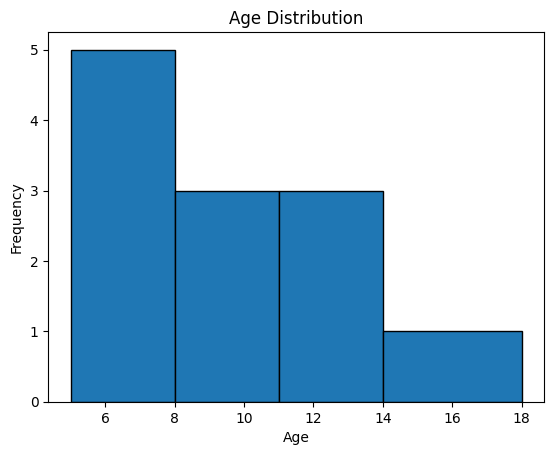

In [ ]:
import matplotlib.pyplot as plt

# Histogram to visualize the age distribution
plt.hist(df['Age'], bins=[5, 8, 11, 14, 18], edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


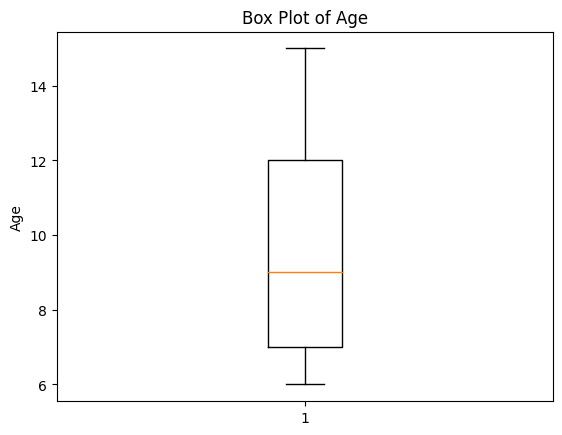

In [ ]:
# Box plot to visualize the spread and outliers of the data
plt.boxplot(df['Age'])
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()



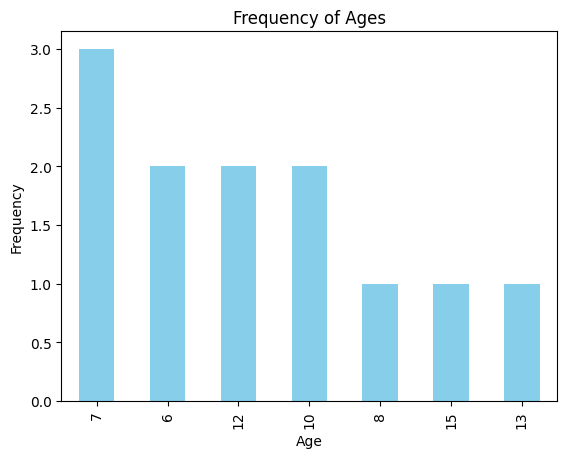

In [ ]:
# Bar plot to visualize frequency of each age
frequency.plot(kind='bar', color='skyblue')
plt.title('Frequency of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



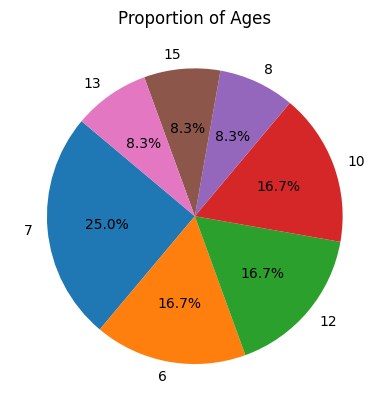

In [ ]:
# Pie chart to visualize proportion of each age
plt.pie(frequency, labels=frequency.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Ages')
plt.show()


In [ ]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis
age_skewness = skew(df['Age'])
age_kurtosis = kurtosis(df['Age'])

print(f"\nSkewness: {age_skewness}")
print(f"Kurtosis: {age_kurtosis}")



Skewness: 0.444163869757001
Kurtosis: -1.1089796873007611


In [ ]:
# Quantiles (e.g., 25th, 50th, 75th percentiles)
quantiles = df['Age'].quantile([0.25, 0.5, 0.75])
print("\nQuantiles:")
print(quantiles)



Quantiles:
0.25     7.0
0.50     9.0
0.75    12.0
Name: Age, dtype: float64


In [ ]:
# Interquartile Range (IQR)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

print(f"\nInterquartile Range (IQR): {IQR}")



Interquartile Range (IQR): 5.0


In [ ]:
# Outlier detection using IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print("\nOutliers:")
print(outliers if not outliers.empty else "No outliers detected.")



Outliers:
No outliers detected.


In [ ]:
# Cumulative frequency distribution
df['Cumulative Frequency'] = df['Age'].rank(method='max').astype(int)
print("\nCumulative Frequency Distribution:")
print(df)



Cumulative Frequency Distribution:
    Age  Cumulative Frequency
0     6                     2
1     7                     5
2     7                     5
3     8                     6
4     6                     2
5     7                     5
6    12                    10
7    10                     8
8    15                    12
9    13                    11
10   12                    10
11   10                     8


<ipython-input-81-dac534459172>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'], shade=True)


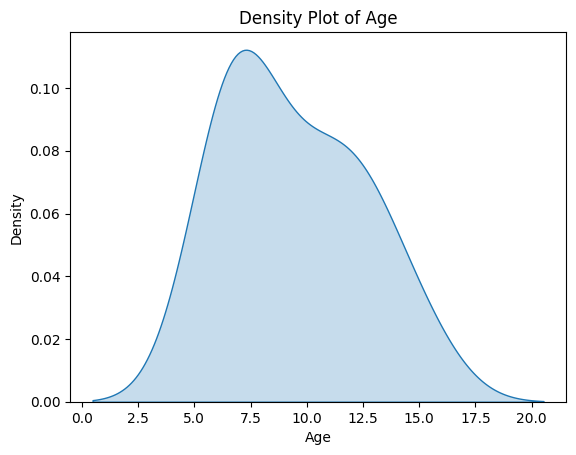

In [ ]:
import seaborn as sns

# Density plot to visualize the distribution of age
sns.kdeplot(df['Age'], shade=True)
plt.title('Density Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


# **Bivariate Analysis**

In [ ]:
import pandas as pd

# Sample data for bivariate analysis
age = [6, 7, 7, 8, 6, 7, 12, 10, 15, 13, 12, 10]
height = [120, 122, 125, 127, 121, 123, 137, 131, 161, 145, 141, 132]

# Create a DataFrame
df = pd.DataFrame({'Age': age, 'Height': height})

# Covariance
covariance = df.cov()
print("Covariance Matrix:")
print(covariance)

# Correlation (Pearson's correlation by default)
correlation = df.corr()
print("\nCorrelation Matrix:")
print(correlation)


Covariance Matrix:
              Age      Height
Age      9.174242   35.689394
Height  35.689394  148.810606

Correlation Matrix:
             Age    Height
Age     1.000000  0.965911
Height  0.965911  1.000000


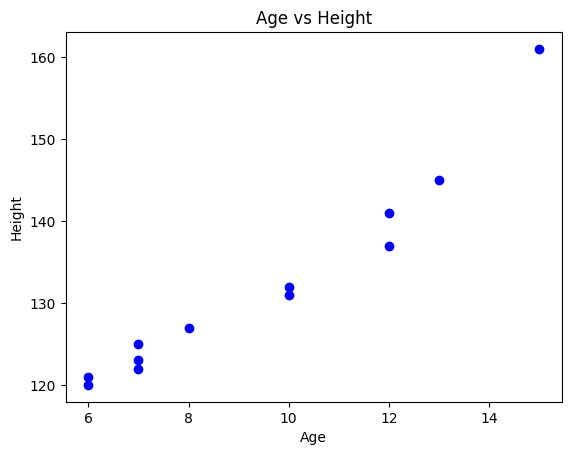

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot to visualize the relationship between Age and Height
plt.scatter(df['Age'], df['Height'], color='blue')
plt.title('Age vs Height')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()


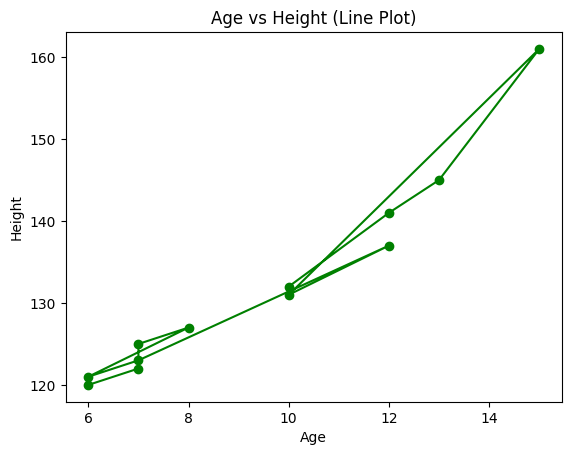

In [ ]:
# Line plot to see the trend between Age and Height
plt.plot(df['Age'], df['Height'], marker='o', linestyle='-', color='green')
plt.title('Age vs Height (Line Plot)')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()


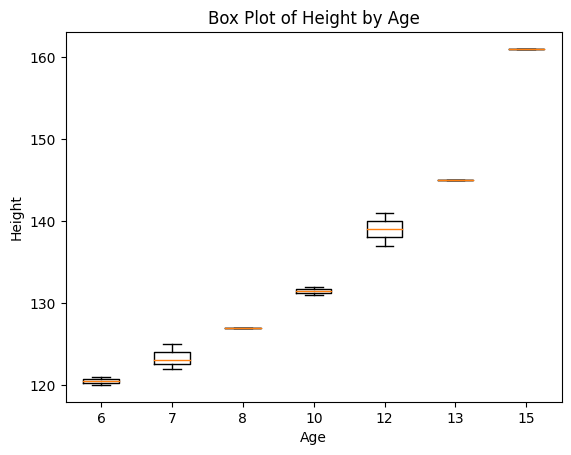

In [ ]:
# Box plot of height grouped by age
plt.boxplot([df[df['Age'] == i]['Height'] for i in sorted(df['Age'].unique())], labels=sorted(df['Age'].unique()))
plt.title('Box Plot of Height by Age')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()


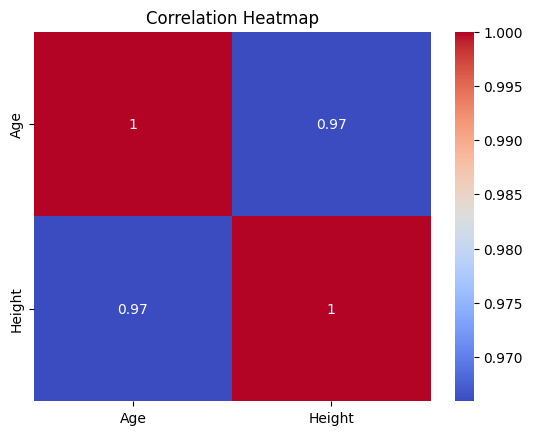

In [ ]:
import seaborn as sns

# Heatmap to visualize the correlation matrix
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


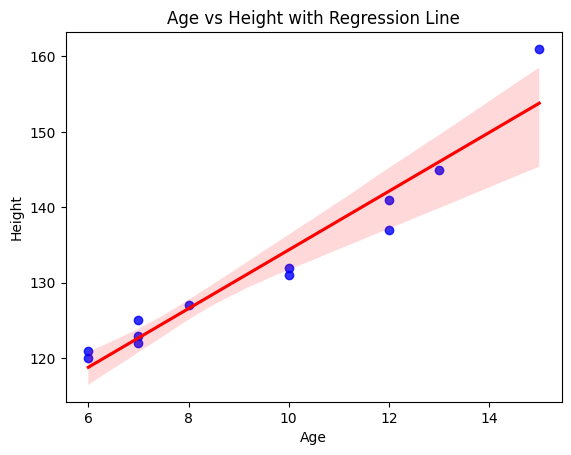

In [ ]:
import numpy as np

# Scatter plot with a regression line
sns.regplot(x='Age', y='Height', data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Age vs Height with Regression Line')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()


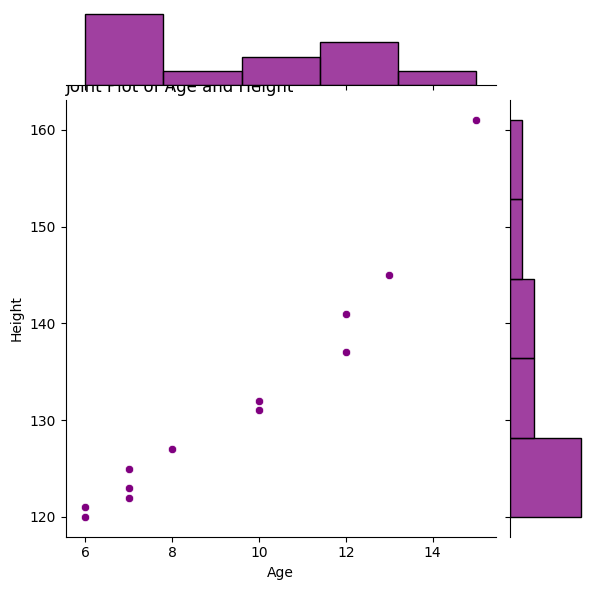

In [ ]:
# Joint plot to visualize both the scatter plot and distributions
sns.jointplot(x='Age', y='Height', data=df, kind='scatter', color='purple')
plt.title('Joint Plot of Age and Height', loc='left')
plt.show()


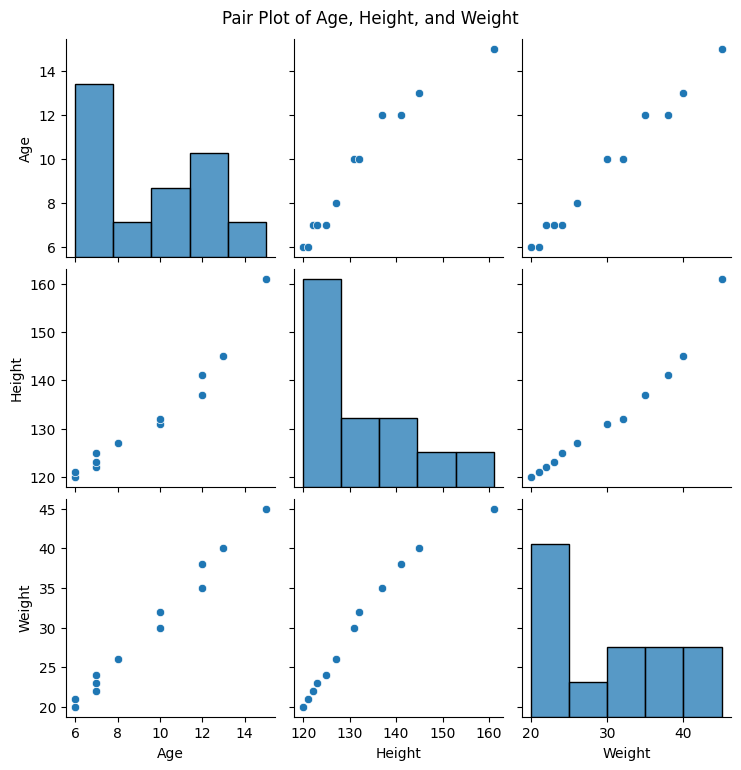

In [ ]:
# Add an additional variable for demonstration
df['Weight'] = [20, 22, 24, 26, 21, 23, 35, 30, 45, 40, 38, 32]

# Pair plot to visualize relationships between all variables
sns.pairplot(df)
plt.suptitle('Pair Plot of Age, Height, and Weight', y=1.02)
plt.show()


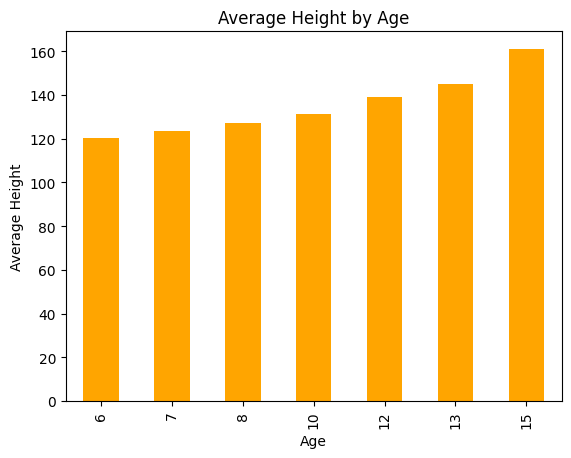

In [ ]:
# Bar plot showing average height for each age group
age_mean_height = df.groupby('Age')['Height'].mean()

age_mean_height.plot(kind='bar', color='orange')
plt.title('Average Height by Age')
plt.xlabel('Age')
plt.ylabel('Average Height')
plt.show()


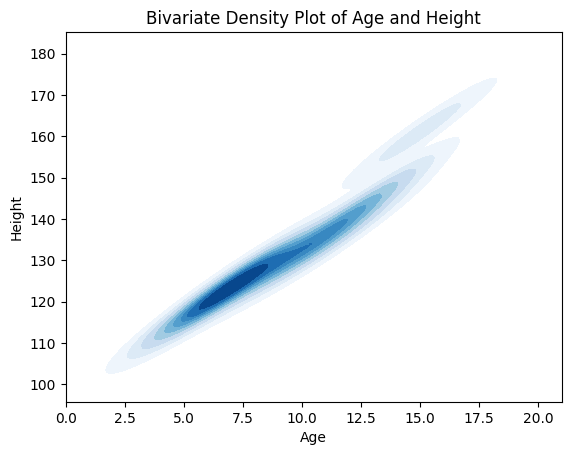

In [ ]:
# Kernel Density Estimate (KDE) plot for age and height
sns.kdeplot(x='Age', y='Height', data=df, cmap='Blues', fill=True)
plt.title('Bivariate Density Plot of Age and Height')
plt.show()


In [ ]:
# Example of cross-tabulation (if Age and Height were categorical variables)
contingency_table = pd.crosstab(df['Age'], df['Height'])
print("\nContingency Table:")
print(contingency_table)



Contingency Table:
Height  120  121  122  123  125  127  131  132  137  141  145  161
Age                                                               
6         1    1    0    0    0    0    0    0    0    0    0    0
7         0    0    1    1    1    0    0    0    0    0    0    0
8         0    0    0    0    0    1    0    0    0    0    0    0
10        0    0    0    0    0    0    1    1    0    0    0    0
12        0    0    0    0    0    0    0    0    1    1    0    0
13        0    0    0    0    0    0    0    0    0    0    1    0
15        0    0    0    0    0    0    0    0    0    0    0    1


In [ ]:
# Pearson, Kendall, and Spearman correlations
pearson_corr = df.corr(method='pearson')
kendall_corr = df.corr(method='kendall')
spearman_corr = df.corr(method='spearman')

print("\nPearson Correlation Matrix:")
print(pearson_corr)
print("\nKendall Correlation Matrix:")
print(kendall_corr)
print("\nSpearman Correlation Matrix:")
print(spearman_corr)



Pearson Correlation Matrix:
             Age    Height    Weight
Age     1.000000  0.965911  0.993655
Height  0.965911  1.000000  0.972260
Weight  0.993655  0.972260  1.000000

Kendall Correlation Matrix:
             Age    Height    Weight
Age     1.000000  0.953463  0.953463
Height  0.953463  1.000000  1.000000
Weight  0.953463  1.000000  1.000000

Spearman Correlation Matrix:
             Age    Height    Weight
Age     1.000000  0.987686  0.987686
Height  0.987686  1.000000  1.000000
Weight  0.987686  1.000000  1.000000


# **MultiVariate Analysis**

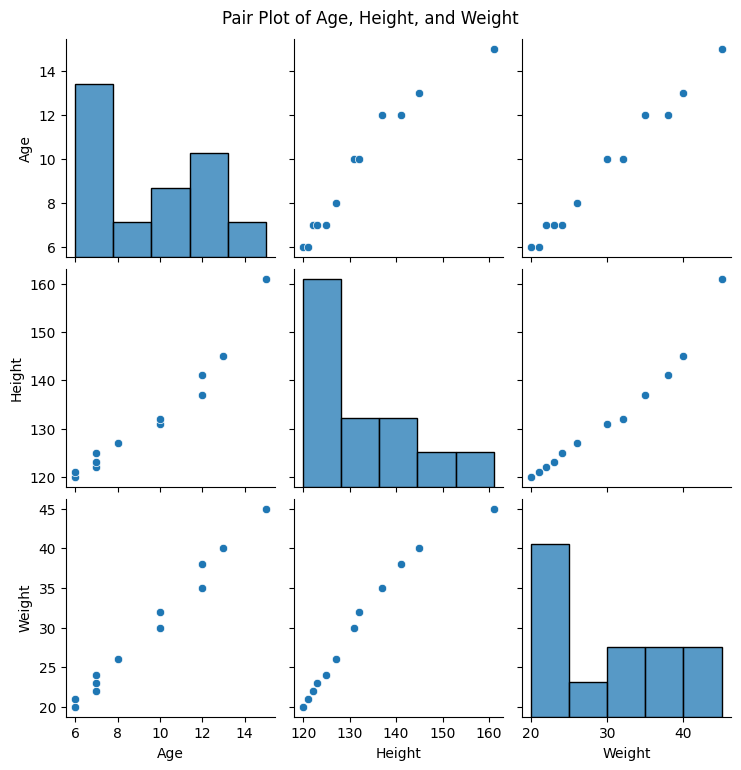

In [ ]:
import seaborn as sns
import pandas as pd

# Sample data
age = [6, 7, 7, 8, 6, 7, 12, 10, 15, 13, 12, 10]
height = [120, 122, 125, 127, 121, 123, 137, 131, 161, 145, 141, 132]
weight = [20, 22, 24, 26, 21, 23, 35, 30, 45, 40, 38, 32]

# Create a DataFrame
df = pd.DataFrame({'Age': age, 'Height': height, 'Weight': weight})

# Pair plot to visualize the relationships between all variables
sns.pairplot(df)
plt.suptitle('Pair Plot of Age, Height, and Weight', y=1.02)
plt.show()


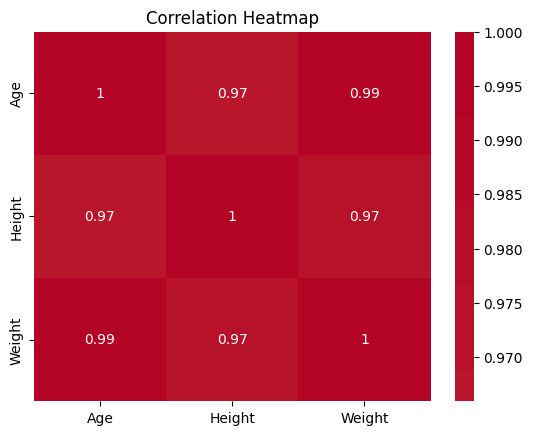

In [ ]:
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = df.corr()

# Heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


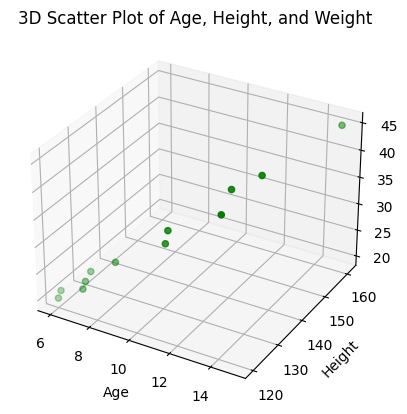

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Height'], df['Weight'], color='green')

ax.set_xlabel('Age')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
plt.title('3D Scatter Plot of Age, Height, and Weight')
plt.show()


In [ ]:
from statsmodels.multivariate.manova import MANOVA

# Define the dependent variables and independent variable (Age in this case)
manova = MANOVA.from_formula('Height + Weight ~ Age', data=df)

# Perform the MANOVA test
print(manova.mv_test())


                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept         Value  Num DF Den DF F Value  Pr > F
-------------------------------------------------------------
          Wilks' lambda  0.0104 2.0000 9.0000 428.3070 0.0000
         Pillai's trace  0.9896 2.0000 9.0000 428.3070 0.0000
 Hotelling-Lawley trace 95.1793 2.0000 9.0000 428.3070 0.0000
    Roy's greatest root 95.1793 2.0000 9.0000 428.3070 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
          Age            Value  Num DF Den DF F Value  Pr > F
-------------------------------------------------------------
          Wilks' lambda  0.0127 2.0000 9.0000 351.2297 0.0000
         Pillai's trace  0.9873 2.0000 9.0000 351.2297 0.0000
 Hotelling-Lawley trace 78

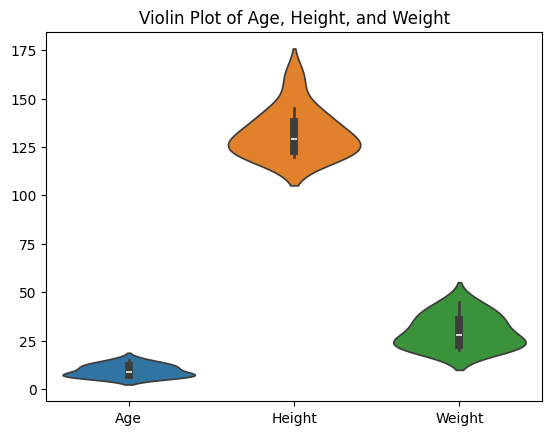

In [ ]:
# Violin plot for Age, Height, and Weight
sns.violinplot(data=df)
plt.title('Violin Plot of Age, Height, and Weight')
plt.show()


<ipython-input-100-6c79aa47ee30>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'], shade=True, label='Age', color='blue')
<ipython-input-100-6c79aa47ee30>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Height'], shade=True, label='Height', color='green')
<ipython-input-100-6c79aa47ee30>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Weight'], shade=True, label='Weight', color='red')


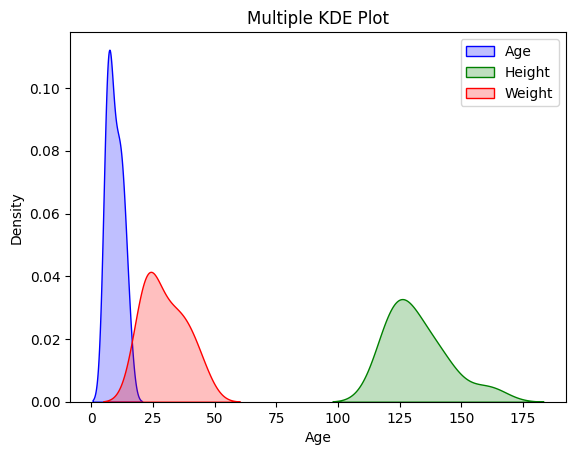

In [ ]:
# KDE plot for all variables
sns.kdeplot(df['Age'], shade=True, label='Age', color='blue')
sns.kdeplot(df['Height'], shade=True, label='Height', color='green')
sns.kdeplot(df['Weight'], shade=True, label='Weight', color='red')
plt.title('Multiple KDE Plot')
plt.legend()
plt.show()


# **Time Series Analysis**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/indo_rct.csv")
df


,rownames,id,site,age,risk,gender,outcome,sod,pep,recpanc,...,sodsom,bsphinc,bstent,chole,pbmal,train,status,type,rx,bleed
0,1,1001,1_UM,26,2.0,1_female,1_yes,1_yes,0_no,1_yes,...,0_no,0_no,0_no,0_no,0_no,1_yes,1_outpatient,1_type 1,1_indomethacin,NaN
1,2,1002,1_UM,24,1.0,2_male,0_no,0_no,1_yes,0_no,...,0_no,1_yes,1_yes,1_yes,0_no,0_no,1_outpatient,0_no SOD,0_placebo,NaN
2,3,1003,1_UM,57,1.0,1_female,0_no,1_yes,0_no,0_no,...,0_no,0_no,0_no,0_no,0_no,0_no,1_outpatient,2_type 2,0_placebo,NaN
3,4,1004,1_UM,29,2.0,1_female,1_yes,1_yes,0_no,0_no,...,0_no,1_yes,0_no,1_yes,0_no,1_yes,1_outpatient,1_type 1,0_placebo,NaN
4,5,1005,1_UM,38,3.5,1_female,0_no,1_yes,1_yes,0_no,...,1_yes,1_yes,0_no,0_no,0_no,1_yes,0_inpatient,1_type 1,1_indomethacin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,598,3021,3_UK,39,2.0,1_female,0_no,0_no,0_no,1_yes,...,0_no,0_no,0_no,0_no,0_no,0_no,1_outpatient,0_no SOD,0_placebo,NaN
598,599,3022,3_UK,50,2.5,1_female,0_no,1_yes,0_no,1_yes,...,1_yes,1_yes,0_no,0_no,0_no,0_no,1_outpatient,2_type 2,0_placebo,NaN
599,600,4001,4_Case,29,1.5,1_female,0_no,0_no,0_no,0_no,...,0_no,1_yes,0_no,1_yes,0_no,1_yes,1_outpatient,1_type 1,0_placebo,NaN
600,601,4002,4_Case,40,1.5,1_female,0_no,1_yes,0_no,0_no,...,0_no,1_yes,0_no,0_no,0_no,1_yes,1_outpatient,1_type 1,1_indomethacin,NaN


In [ ]:
# Inspect and preprocess the data
print("First few rows of the dataset:")
print(df.head())
print("\nData types of the columns:")
print(df.dtypes)


First few rows of the dataset:
   rownames    id  site  age  risk    gender outcome    sod    pep recpanc  \
0         1  1001  1_UM   26   2.0  1_female   1_yes  1_yes   0_no   1_yes   
1         2  1002  1_UM   24   1.0    2_male    0_no   0_no  1_yes    0_no   
2         3  1003  1_UM   57   1.0  1_female    0_no  1_yes   0_no    0_no   
3         4  1004  1_UM   29   2.0  1_female   1_yes  1_yes   0_no    0_no   
4         5  1005  1_UM   38   3.5  1_female    0_no  1_yes  1_yes    0_no   

   ... sodsom bsphinc bstent  chole pbmal  train        status      type  \
0  ...   0_no    0_no   0_no   0_no  0_no  1_yes  1_outpatient  1_type 1   
1  ...   0_no   1_yes  1_yes  1_yes  0_no   0_no  1_outpatient  0_no SOD   
2  ...   0_no    0_no   0_no   0_no  0_no   0_no  1_outpatient  2_type 2   
3  ...   0_no   1_yes   0_no  1_yes  0_no  1_yes  1_outpatient  1_type 1   
4  ...  1_yes   1_yes   0_no   0_no  0_no  1_yes   0_inpatient  1_type 1   

               rx bleed  
0  1_indomethacin

In [ ]:
# Create a date range index if frequency is known (e.g., daily data)

df.index = pd.date_range(start='2020-01-01', periods=len(df), freq='D')
print(df.index)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2021-08-15', '2021-08-16', '2021-08-17', '2021-08-18',
               '2021-08-19', '2021-08-20', '2021-08-21', '2021-08-22',
               '2021-08-23', '2021-08-24'],
              dtype='datetime64[ns]', length=602, freq='D')


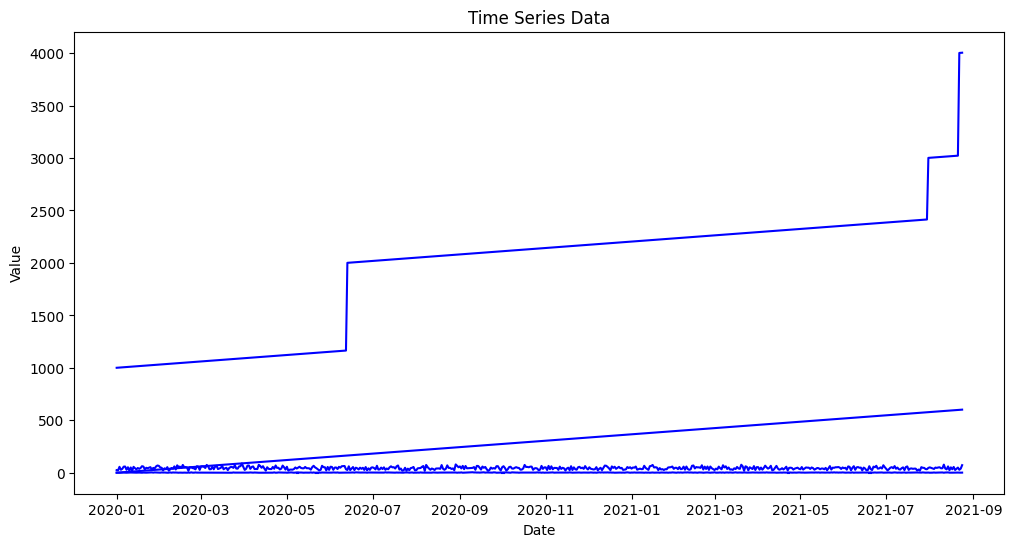

In [ ]:
# Continue with Time Series Analysis (Visualize, Decompose, etc.)
df_numeric = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 6))
plt.plot(df_numeric, color='blue')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

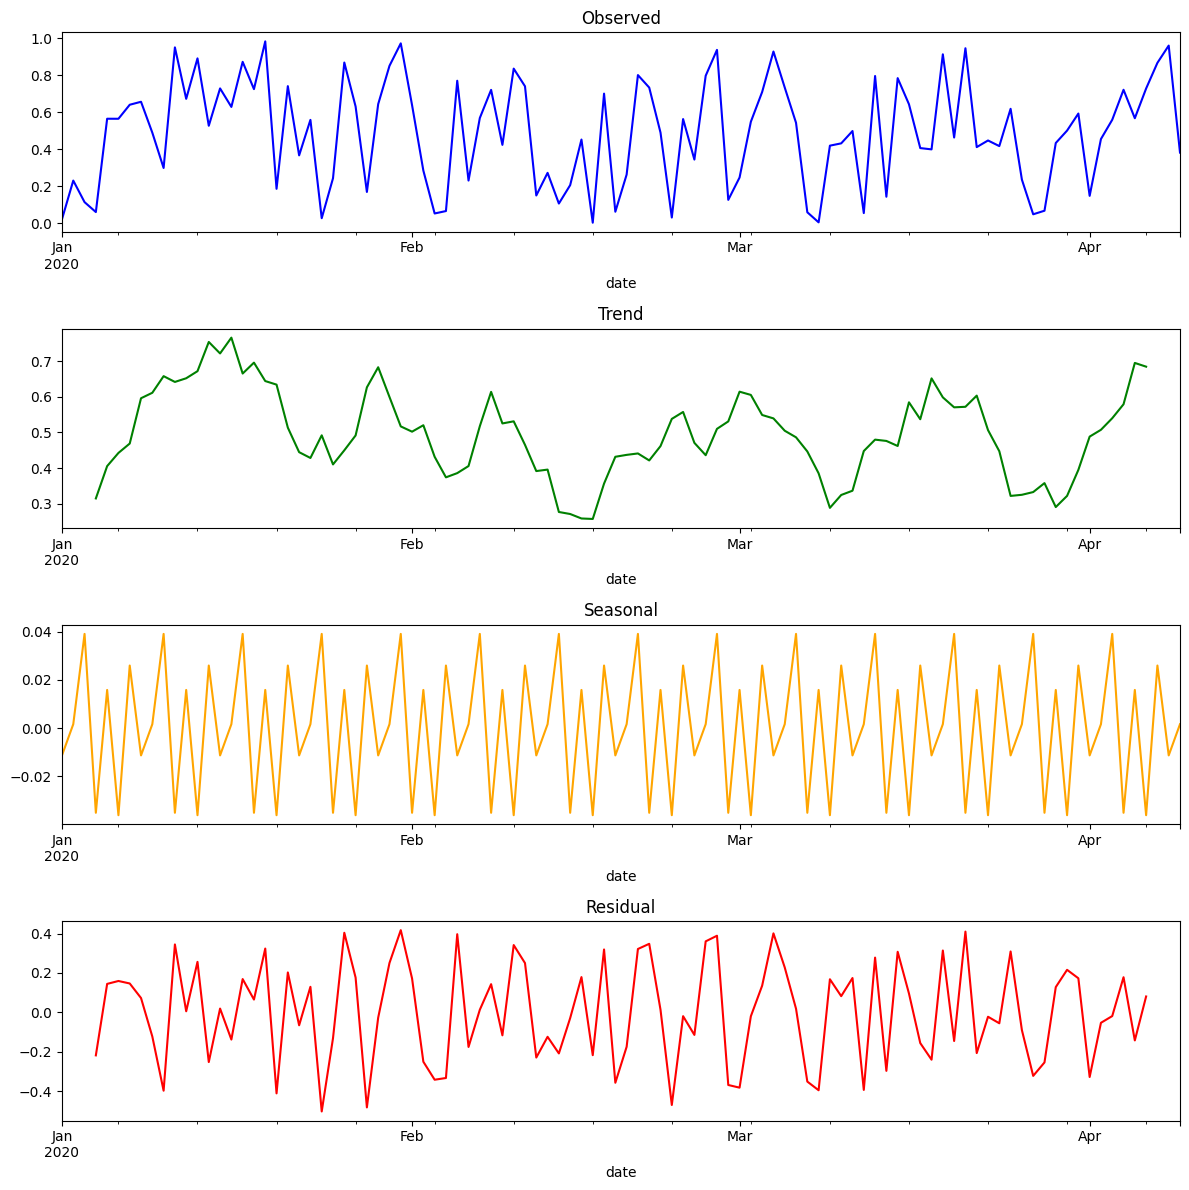

In [ ]:
# Decompose the time series into trend, seasonality, and residuals

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df_numeric = pd.DataFrame({
    'date': pd.date_range(start='2020-01-01', periods=100, freq='D'),
    'value': np.random.rand(100)  # Example random data
})


df_numeric['date'] = pd.to_datetime(df_numeric['date'])
df_numeric.set_index('date', inplace=True)


df_numeric = df_numeric.fillna(0)


decomposition = seasonal_decompose(df_numeric['value'], model='additive')
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 12))
decomposition.observed.plot(ax=ax1, color='blue', title='Observed')
decomposition.trend.plot(ax=ax2, color='green', title='Trend')
decomposition.seasonal.plot(ax=ax3, color='orange', title='Seasonal')
decomposition.resid.plot(ax=ax4, color='red', title='Residual')
plt.tight_layout()
plt.show()

In [ ]:
# Check for stationarity using Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_numeric.dropna())
print('\nADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -8.25933414916538
p-value: 5.133801108312204e-13


<Figure size 1200x600 with 0 Axes>

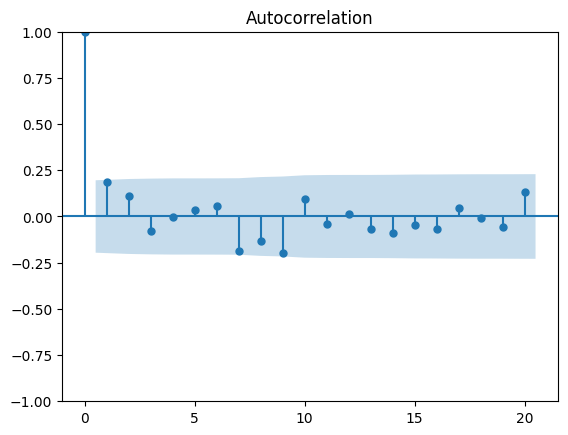

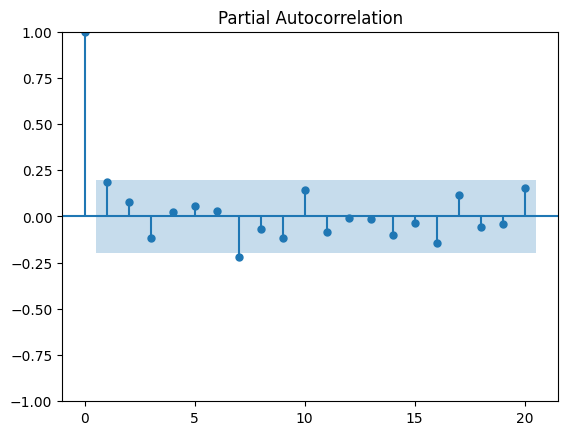

In [ ]:
# Plot ACF and PACF for model selectionimport matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))
plot_acf(df_numeric, lags=20)
plot_pacf(df_numeric, lags=20)
plt.show()

In [ ]:
# Fit an ARIMA model
from statsmodels.tsa.arima.model import ARIMA
p, d, q = 1, 1, 1
model = ARIMA(df_numeric, order=(p, d, q))
arima_result = model.fit()

print("\nARIMA Model Summary:")
print(arima_result.summary())



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)



ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -16.901
Date:                Wed, 06 Nov 2024   AIC                             39.803
Time:                        05:45:25   BIC                             47.588
Sample:                    01-01-2020   HQIC                            42.953
                         - 04-09-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2022      0.112      1.806      0.071      -0.017       0.422
ma.L1         -0.9990      1.420     -0.704      0.482      -3.782       1.784
sigma2         0.0789      0.1

In [ ]:
# Forecasting future values
forecast = arima_result.get_forecast(steps=10)
forecast_ci = forecast.conf_int()


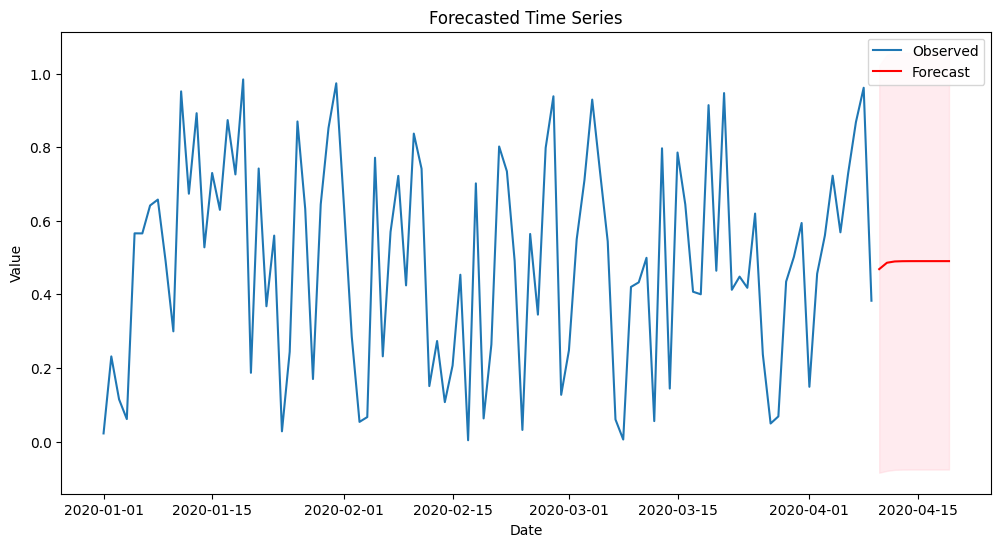

In [ ]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df_numeric, label='Observed')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Forecasted Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# **Exploratory Data Analysis for Structured Data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/indo_rct.csv")
data

,rownames,id,site,age,risk,gender,outcome,sod,pep,recpanc,...,sodsom,bsphinc,bstent,chole,pbmal,train,status,type,rx,bleed
0,1,1001,1_UM,26,2.0,1_female,1_yes,1_yes,0_no,1_yes,...,0_no,0_no,0_no,0_no,0_no,1_yes,1_outpatient,1_type 1,1_indomethacin,NaN
1,2,1002,1_UM,24,1.0,2_male,0_no,0_no,1_yes,0_no,...,0_no,1_yes,1_yes,1_yes,0_no,0_no,1_outpatient,0_no SOD,0_placebo,NaN
2,3,1003,1_UM,57,1.0,1_female,0_no,1_yes,0_no,0_no,...,0_no,0_no,0_no,0_no,0_no,0_no,1_outpatient,2_type 2,0_placebo,NaN
3,4,1004,1_UM,29,2.0,1_female,1_yes,1_yes,0_no,0_no,...,0_no,1_yes,0_no,1_yes,0_no,1_yes,1_outpatient,1_type 1,0_placebo,NaN
4,5,1005,1_UM,38,3.5,1_female,0_no,1_yes,1_yes,0_no,...,1_yes,1_yes,0_no,0_no,0_no,1_yes,0_inpatient,1_type 1,1_indomethacin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,598,3021,3_UK,39,2.0,1_female,0_no,0_no,0_no,1_yes,...,0_no,0_no,0_no,0_no,0_no,0_no,1_outpatient,0_no SOD,0_placebo,NaN
598,599,3022,3_UK,50,2.5,1_female,0_no,1_yes,0_no,1_yes,...,1_yes,1_yes,0_no,0_no,0_no,0_no,1_outpatient,2_type 2,0_placebo,NaN
599,600,4001,4_Case,29,1.5,1_female,0_no,0_no,0_no,0_no,...,0_no,1_yes,0_no,1_yes,0_no,1_yes,1_outpatient,1_type 1,0_placebo,NaN
600,601,4002,4_Case,40,1.5,1_female,0_no,1_yes,0_no,0_no,...,0_no,1_yes,0_no,0_no,0_no,1_yes,1_outpatient,1_type 1,1_indomethacin,NaN


In [ ]:
# Summary Statistics
summary = data.describe(include='all')
summary

,rownames,id,site,age,risk,gender,outcome,sod,pep,recpanc,...,sodsom,bsphinc,bstent,chole,pbmal,train,status,type,rx,bleed
count,602.000000,602.000000,602,602.000000,602.000000,602,602,602,602,602,...,602,602,602,602,602,602,602,602,602,27.000000
unique,NaN,NaN,4,NaN,NaN,2,2,2,2,2,...,2,2,2,2,2,2,2,4,2,NaN
top,NaN,NaN,2_IU,NaN,NaN,1_female,0_no,1_yes,0_no,0_no,...,1_yes,1_yes,0_no,0_no,0_no,0_no,1_outpatient,2_type 2,0_placebo,NaN
freq,NaN,NaN,413,NaN,NaN,476,523,495,506,422,...,316,344,567,574,600,319,579,274,307,NaN
mean,301.500000,1939.425249,NaN,45.269103,2.381229,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.592593
std,173.926709,568.733133,NaN,13.297968,0.881269,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500712
min,1.000000,1001.000000,NaN,19.000000,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,151.250000,1152.250000,NaN,35.000000,1.500000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,301.500000,2137.500000,NaN,45.000000,2.500000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
75%,451.750000,2288.750000,NaN,54.000000,3.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000


In [ ]:
# Missing Values
missing_values = data.isnull().sum()
missing_values

,0
rownames,0
id,0
site,0
age,0
risk,0
gender,0
outcome,0
sod,0
pep,0
recpanc,0


In [ ]:
#Unique Values Count
unique_values = data.nunique()
unique_values

,0
rownames,602
id,602
site,4
age,62
risk,10
gender,2
outcome,2
sod,2
pep,2
recpanc,2


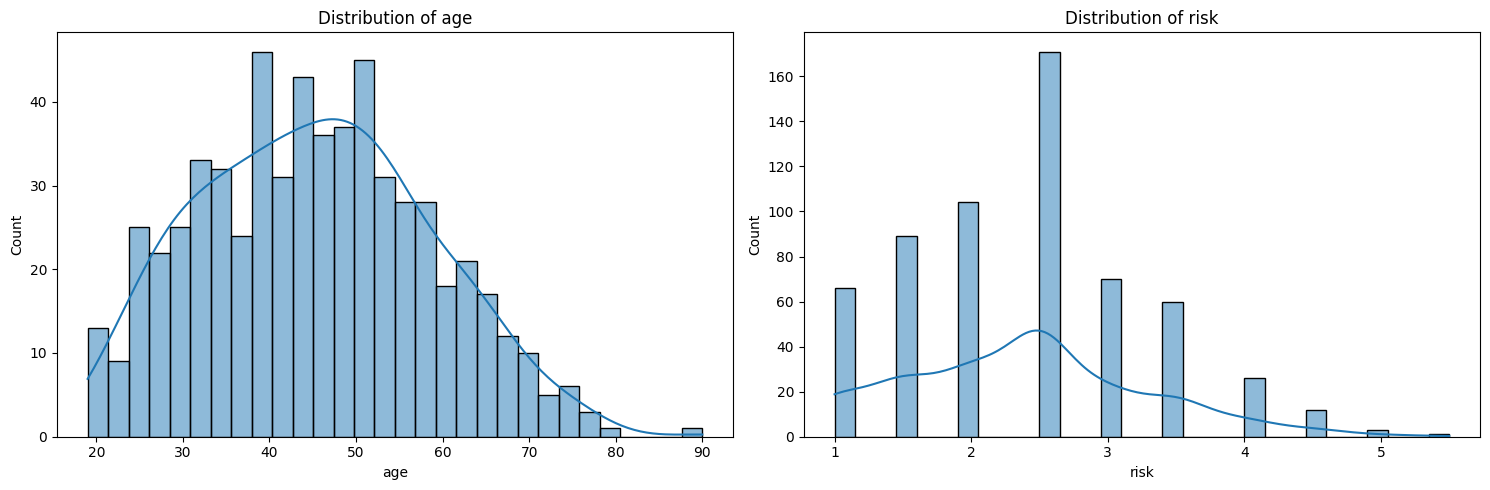

In [ ]:
# Plot distribution of numeric columns
plt.figure(figsize=(15, 5))
for i, col in enumerate(['age', 'risk'], 1):
    plt.subplot(1, 2, i)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

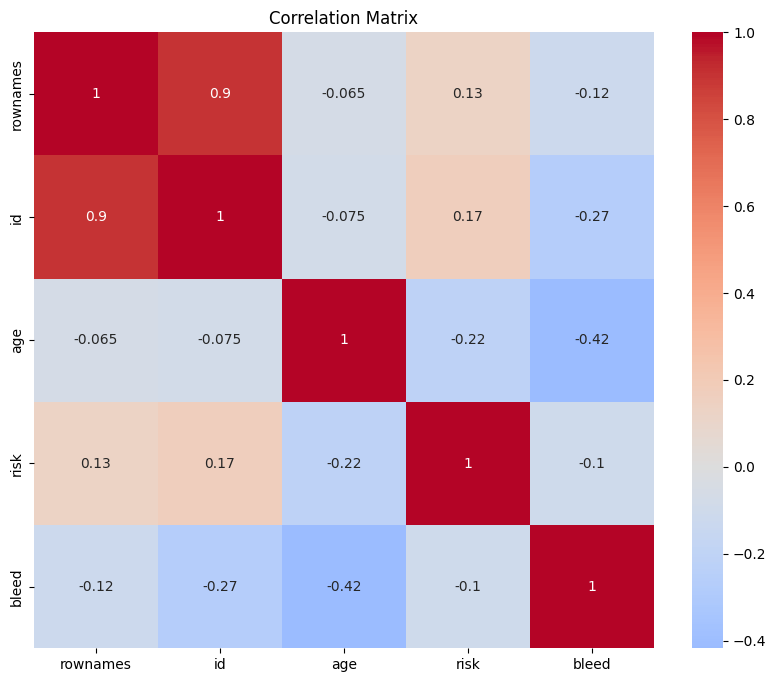

In [ ]:
# Correlation Heatmap for Numerical Variables
import matplotlib.pyplot as plt
import seaborn as sns
numeric_data = data.select_dtypes(include=[float, int])


plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

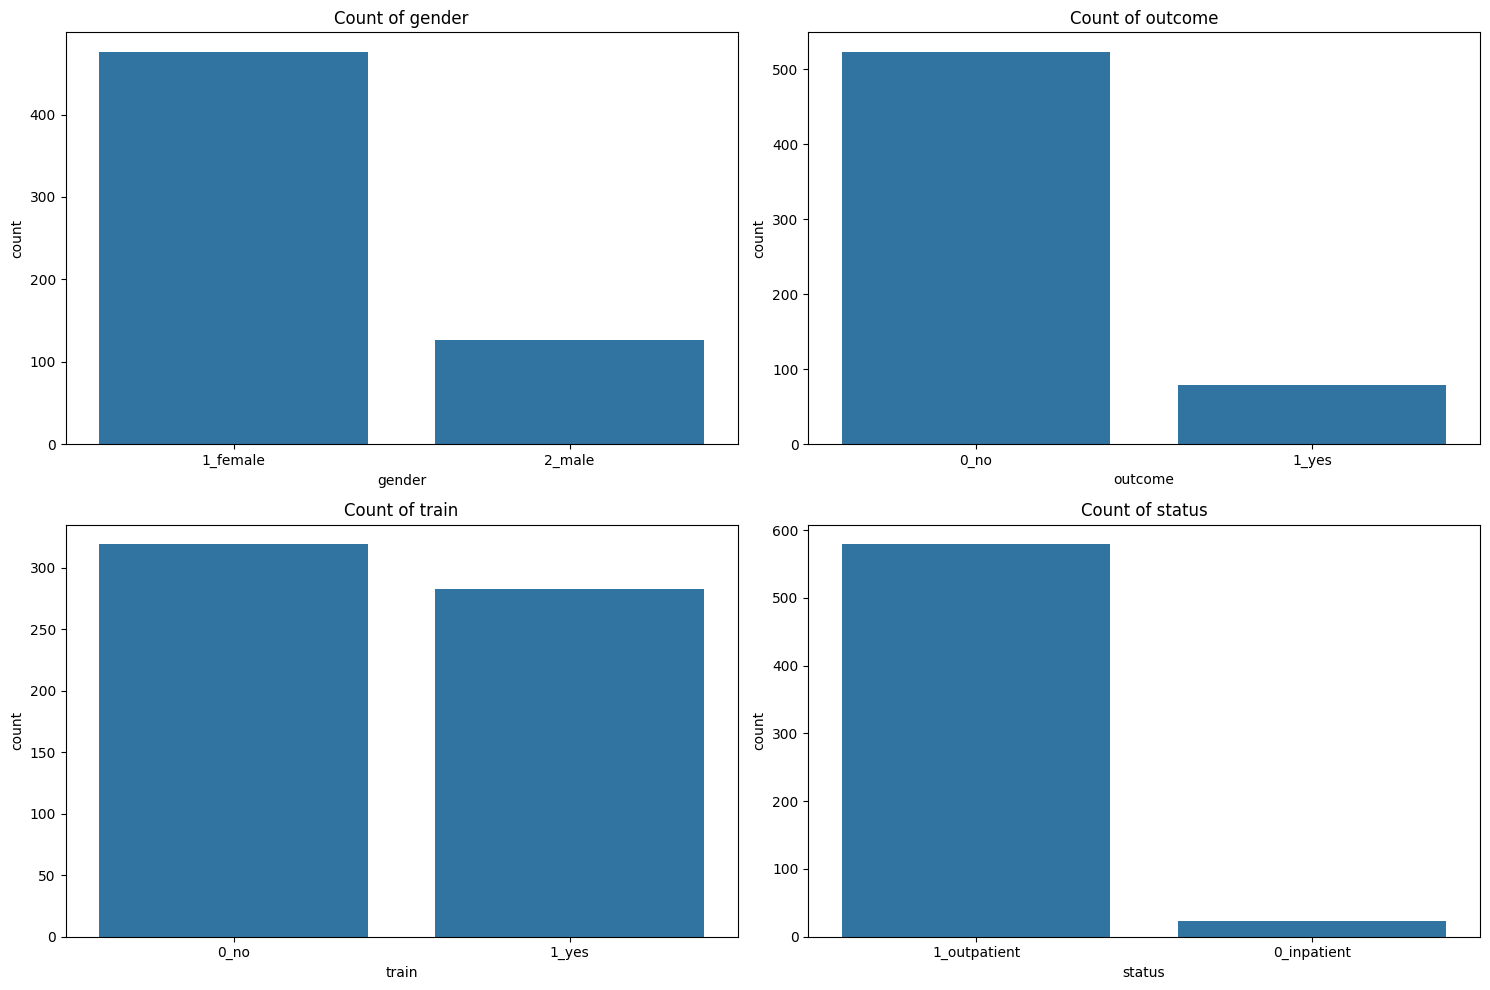

In [ ]:
# Count plots for a few key categorical columns
categorical_cols = ['gender', 'outcome', 'train', 'status']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

# **2D Analysis**

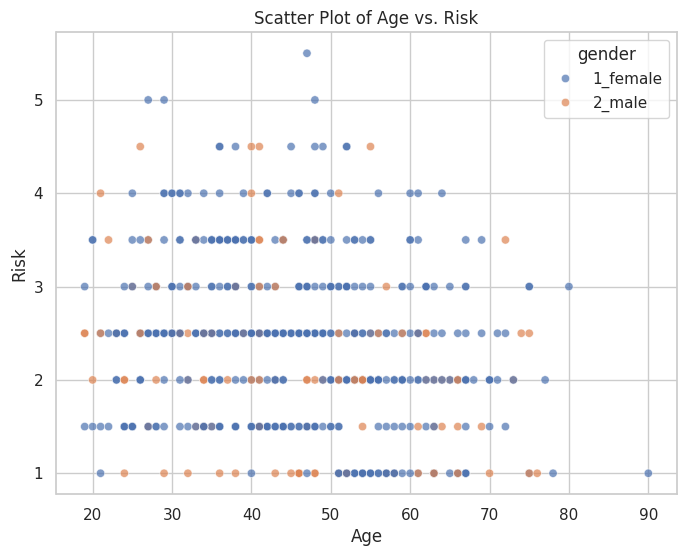

<ipython-input-62-6f45b6018440>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='outcome', y='risk', palette='Set2')


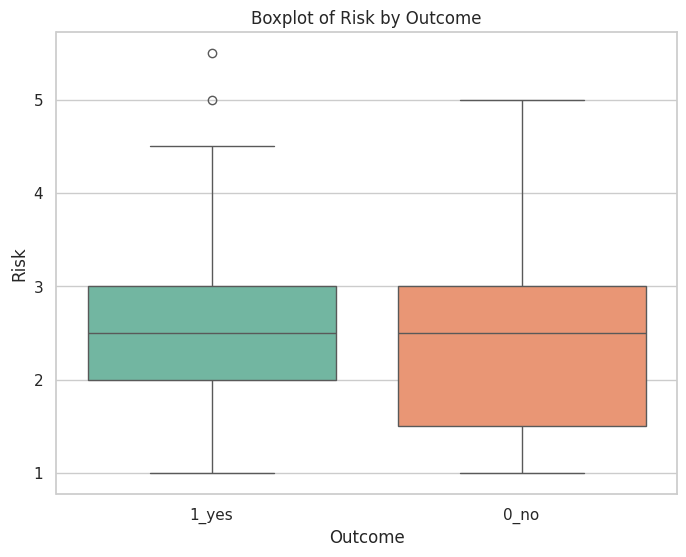

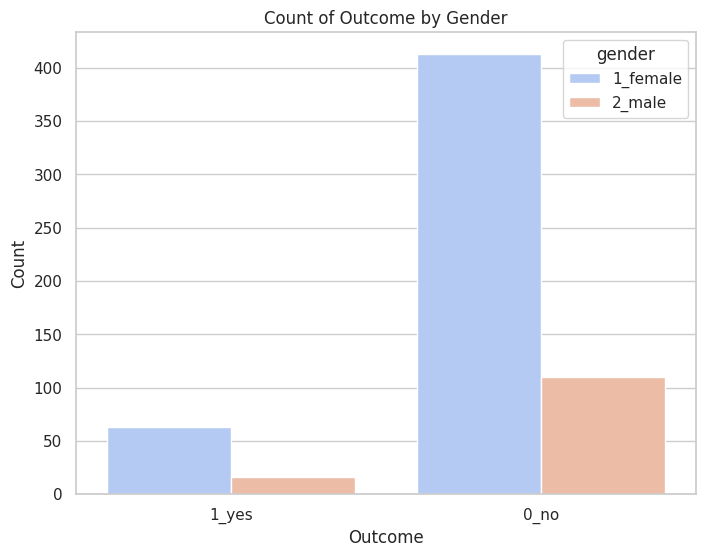

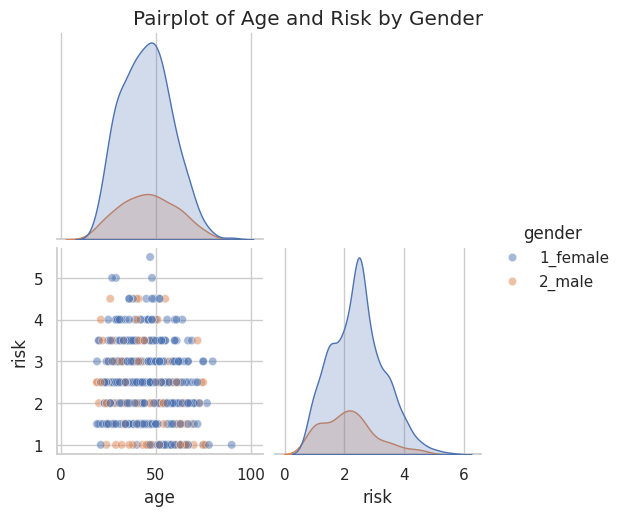

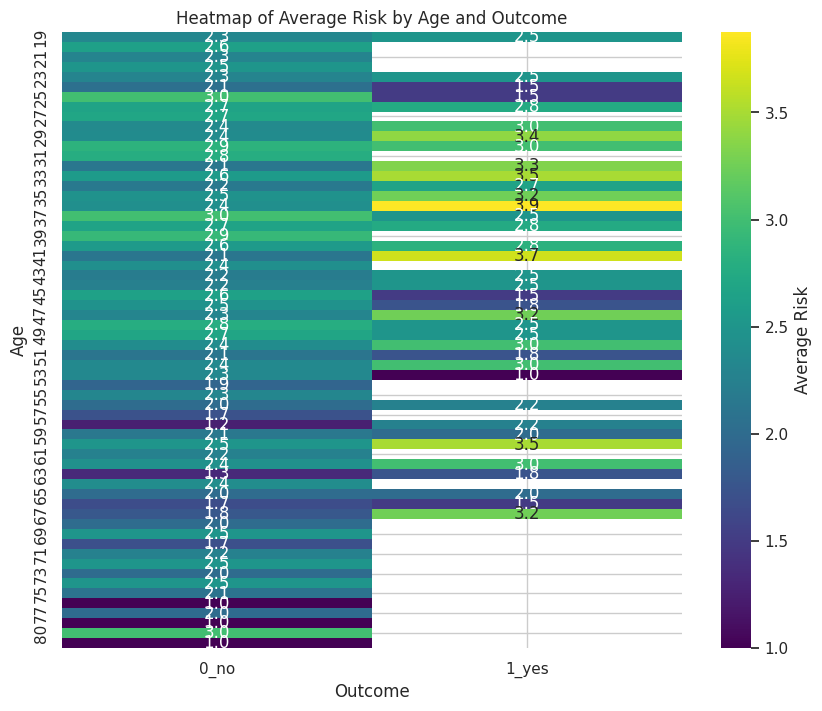

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/indo_rct.csv")
data


In [ ]:
# Set plot style
sns.set(style="whitegrid")

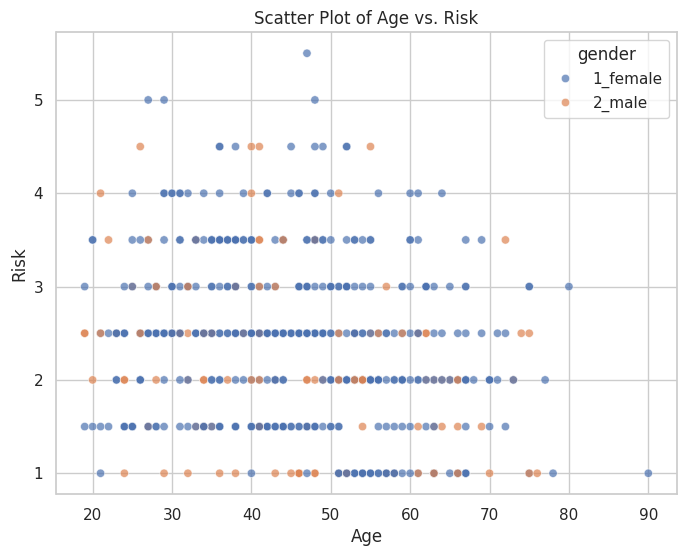

In [ ]:
# Scatter plot to show relationship between 'age' and 'risk'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='age', y='risk', hue='gender', alpha=0.7)
plt.title('Scatter Plot of Age vs. Risk')
plt.xlabel('Age')
plt.ylabel('Risk')
plt.show()

<ipython-input-65-d535d071acfb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='outcome', y='risk', palette='Set2')


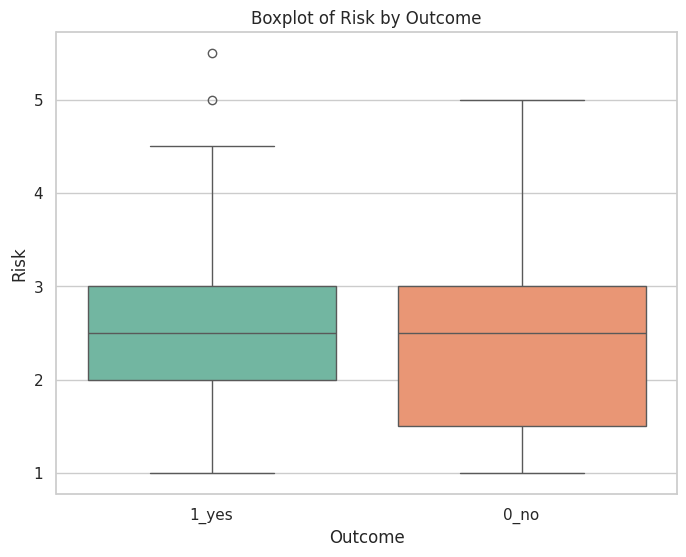

In [ ]:
# Boxplot to show distribution of 'risk' by 'outcome'
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='outcome', y='risk', palette='Set2')
plt.title('Boxplot of Risk by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Risk')
plt.show()

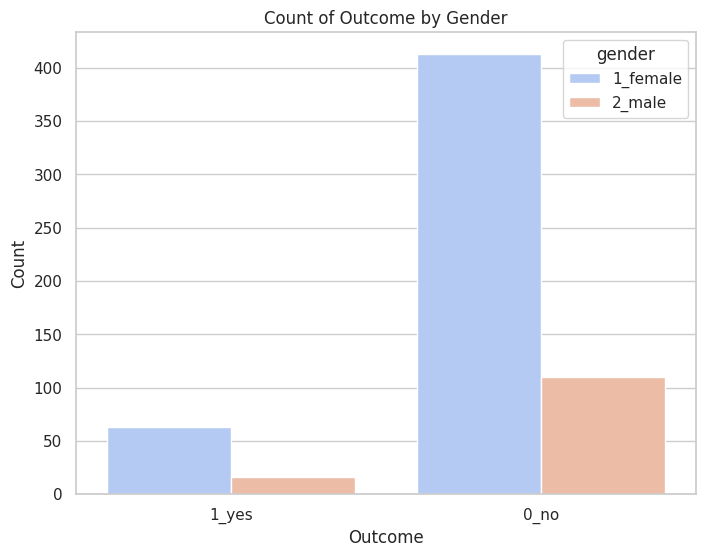

In [ ]:
# Count plot to show count of 'gender' by 'outcome'
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='outcome', hue='gender', palette='coolwarm')
plt.title('Count of Outcome by Gender')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()


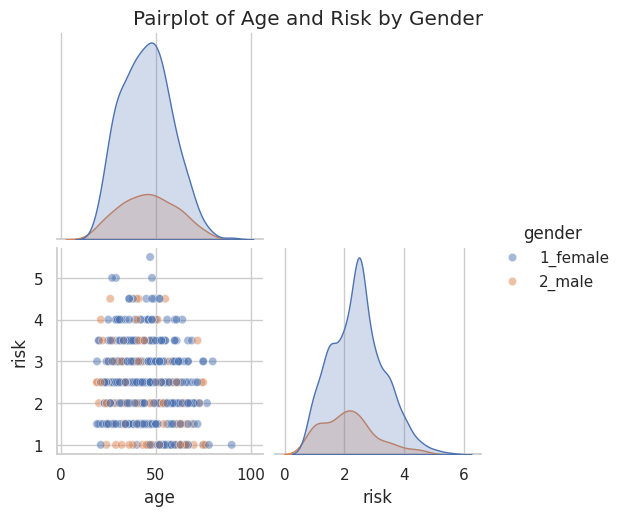

In [ ]:
# Pairplot of selected numerical columns and hue by 'gender'
sns.pairplot(data, vars=['age', 'risk'], hue='gender', corner=True, plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Age and Risk by Gender', y=1.02)
plt.show()

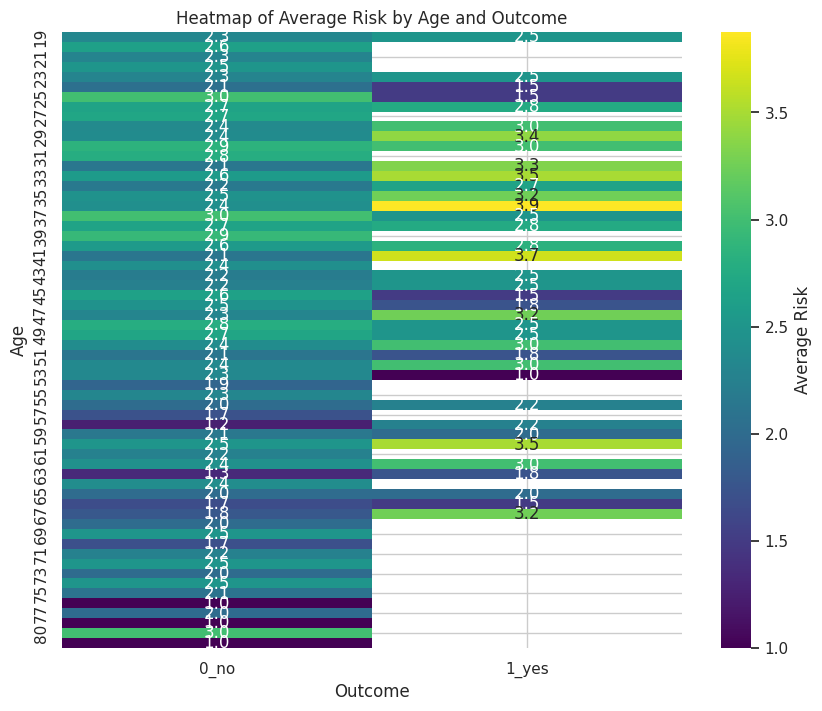

In [ ]:
# Pivot table for average 'risk' by 'age' and 'outcome'
pivot_table = data.pivot_table(values='risk', index='age', columns='outcome', aggfunc='mean')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt=".1f", cbar_kws={'label': 'Average Risk'})
plt.title('Heatmap of Average Risk by Age and Outcome')
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.show()

# **N-D Analysis**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load dataset
data = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/indo_rct.csv")
data


,rownames,id,site,age,risk,gender,outcome,sod,pep,recpanc,...,sodsom,bsphinc,bstent,chole,pbmal,train,status,type,rx,bleed
0,1,1001,1_UM,26,2.0,1_female,1_yes,1_yes,0_no,1_yes,...,0_no,0_no,0_no,0_no,0_no,1_yes,1_outpatient,1_type 1,1_indomethacin,NaN
1,2,1002,1_UM,24,1.0,2_male,0_no,0_no,1_yes,0_no,...,0_no,1_yes,1_yes,1_yes,0_no,0_no,1_outpatient,0_no SOD,0_placebo,NaN
2,3,1003,1_UM,57,1.0,1_female,0_no,1_yes,0_no,0_no,...,0_no,0_no,0_no,0_no,0_no,0_no,1_outpatient,2_type 2,0_placebo,NaN
3,4,1004,1_UM,29,2.0,1_female,1_yes,1_yes,0_no,0_no,...,0_no,1_yes,0_no,1_yes,0_no,1_yes,1_outpatient,1_type 1,0_placebo,NaN
4,5,1005,1_UM,38,3.5,1_female,0_no,1_yes,1_yes,0_no,...,1_yes,1_yes,0_no,0_no,0_no,1_yes,0_inpatient,1_type 1,1_indomethacin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,598,3021,3_UK,39,2.0,1_female,0_no,0_no,0_no,1_yes,...,0_no,0_no,0_no,0_no,0_no,0_no,1_outpatient,0_no SOD,0_placebo,NaN
598,599,3022,3_UK,50,2.5,1_female,0_no,1_yes,0_no,1_yes,...,1_yes,1_yes,0_no,0_no,0_no,0_no,1_outpatient,2_type 2,0_placebo,NaN
599,600,4001,4_Case,29,1.5,1_female,0_no,0_no,0_no,0_no,...,0_no,1_yes,0_no,1_yes,0_no,1_yes,1_outpatient,1_type 1,0_placebo,NaN
600,601,4002,4_Case,40,1.5,1_female,0_no,1_yes,0_no,0_no,...,0_no,1_yes,0_no,0_no,0_no,1_yes,1_outpatient,1_type 1,1_indomethacin,NaN


In [ ]:
# Set plot style
sns.set(style="whitegrid")

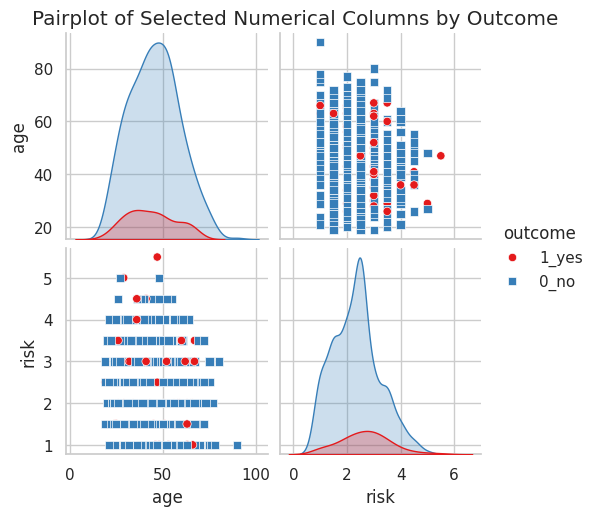

In [ ]:
# 1. Pairplot for Higher-Dimensional Relationships
numerical_cols = ['age', 'risk']
pairplot_data = data[numerical_cols + ['gender', 'outcome']]
sns.pairplot(pairplot_data, hue='outcome', diag_kind='kde', markers=["o", "s"], palette="Set1")
plt.suptitle('Pairplot of Selected Numerical Columns by Outcome', y=1.02)
plt.show()

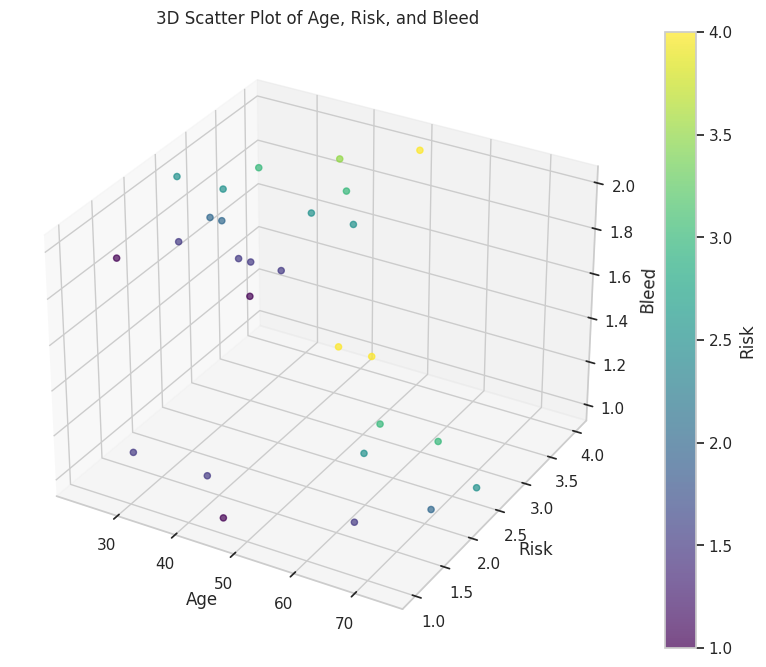

In [ ]:
# 3D Scatter Plot for Three Variables
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(data['age'], data['risk'], data['bleed'], c=data['risk'], cmap='viridis', alpha=0.7)
ax.set_xlabel('Age')
ax.set_ylabel('Risk')
ax.set_zlabel('Bleed')
plt.colorbar(sc, label='Risk')
plt.title('3D Scatter Plot of Age, Risk, and Bleed')
plt.show()

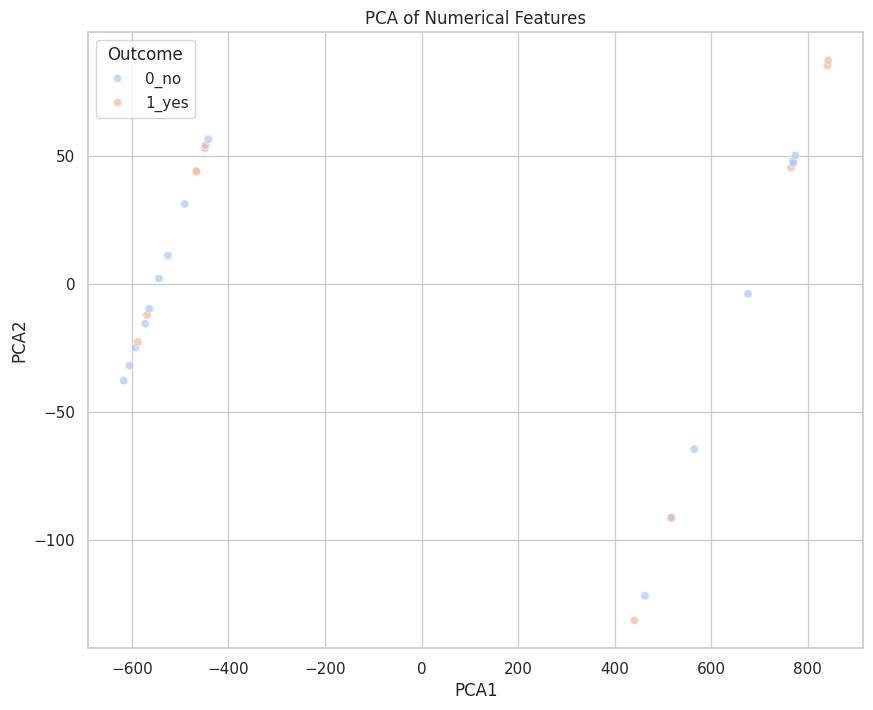

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Select numerical features
numerical_data = data.select_dtypes(include=[np.number])

# Fill missing values with the mean of each column
numerical_data.fillna(numerical_data.mean(), inplace=True)

# Perform PCA on numerical data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numerical_data)
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# Plot PCA result
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='outcome', data=data, palette='coolwarm', alpha=0.7)
plt.title('PCA of Numerical Features')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Outcome')
plt.show()


# **K Means Clustering**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Load dataset
data = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/indo_rct.csv")
data

,rownames,id,site,age,risk,gender,outcome,sod,pep,recpanc,...,sodsom,bsphinc,bstent,chole,pbmal,train,status,type,rx,bleed
0,1,1001,1_UM,26,2.0,1_female,1_yes,1_yes,0_no,1_yes,...,0_no,0_no,0_no,0_no,0_no,1_yes,1_outpatient,1_type 1,1_indomethacin,NaN
1,2,1002,1_UM,24,1.0,2_male,0_no,0_no,1_yes,0_no,...,0_no,1_yes,1_yes,1_yes,0_no,0_no,1_outpatient,0_no SOD,0_placebo,NaN
2,3,1003,1_UM,57,1.0,1_female,0_no,1_yes,0_no,0_no,...,0_no,0_no,0_no,0_no,0_no,0_no,1_outpatient,2_type 2,0_placebo,NaN
3,4,1004,1_UM,29,2.0,1_female,1_yes,1_yes,0_no,0_no,...,0_no,1_yes,0_no,1_yes,0_no,1_yes,1_outpatient,1_type 1,0_placebo,NaN
4,5,1005,1_UM,38,3.5,1_female,0_no,1_yes,1_yes,0_no,...,1_yes,1_yes,0_no,0_no,0_no,1_yes,0_inpatient,1_type 1,1_indomethacin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,598,3021,3_UK,39,2.0,1_female,0_no,0_no,0_no,1_yes,...,0_no,0_no,0_no,0_no,0_no,0_no,1_outpatient,0_no SOD,0_placebo,NaN
598,599,3022,3_UK,50,2.5,1_female,0_no,1_yes,0_no,1_yes,...,1_yes,1_yes,0_no,0_no,0_no,0_no,1_outpatient,2_type 2,0_placebo,NaN
599,600,4001,4_Case,29,1.5,1_female,0_no,0_no,0_no,0_no,...,0_no,1_yes,0_no,1_yes,0_no,1_yes,1_outpatient,1_type 1,0_placebo,NaN
600,601,4002,4_Case,40,1.5,1_female,0_no,1_yes,0_no,0_no,...,0_no,1_yes,0_no,0_no,0_no,1_yes,1_outpatient,1_type 1,1_indomethacin,NaN


In [ ]:
# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())


Missing values in each column:
 rownames         0
id               0
site             0
age              0
risk             0
gender           0
outcome          0
sod              0
pep              0
recpanc          0
psphinc          0
precut           0
difcan           0
pneudil          0
amp              0
paninj           0
acinar           0
brush            0
asa81            0
asa325           0
asa              0
prophystent      0
therastent       0
pdstent          0
sodsom           0
bsphinc          0
bstent           0
chole            0
pbmal            0
train            0
status           0
type             0
rx               0
bleed          575
dtype: int64


In [ ]:
# Fill or drop missing values as necessary (assuming we drop them here)
data = data.dropna()
data

,rownames,id,site,age,risk,gender,outcome,sod,pep,recpanc,...,sodsom,bsphinc,bstent,chole,pbmal,train,status,type,rx,bleed
7,8,1008,1_UM,29,1.0,2_male,0_no,0_no,0_no,0_no,...,0_no,1_yes,0_no,1_yes,0_no,1_yes,1_outpatient,0_no SOD,1_indomethacin,2.0
17,18,1018,1_UM,46,1.5,1_female,0_no,0_no,0_no,0_no,...,0_no,0_no,0_no,0_no,0_no,1_yes,1_outpatient,0_no SOD,0_placebo,2.0
27,28,1028,1_UM,42,4.0,1_female,0_no,1_yes,1_yes,1_yes,...,1_yes,1_yes,0_no,0_no,0_no,1_yes,1_outpatient,1_type 1,1_indomethacin,1.0
31,32,1032,1_UM,51,1.5,1_female,1_yes,0_no,0_no,0_no,...,0_no,1_yes,1_yes,0_no,0_no,1_yes,1_outpatient,0_no SOD,0_placebo,2.0
43,44,1044,1_UM,71,2.0,1_female,0_no,1_yes,0_no,0_no,...,0_no,1_yes,0_no,0_no,0_no,0_no,1_outpatient,1_type 1,1_indomethacin,1.0
46,47,1047,1_UM,46,1.0,2_male,1_yes,0_no,0_no,0_no,...,0_no,1_yes,1_yes,0_no,0_no,1_yes,1_outpatient,0_no SOD,0_placebo,1.0
50,51,1051,1_UM,51,1.0,2_male,0_no,0_no,0_no,0_no,...,0_no,1_yes,1_yes,0_no,0_no,1_yes,1_outpatient,0_no SOD,0_placebo,2.0
66,67,1067,1_UM,34,1.5,2_male,0_no,0_no,1_yes,1_yes,...,0_no,0_no,0_no,0_no,0_no,1_yes,1_outpatient,0_no SOD,0_placebo,2.0
81,82,1082,1_UM,55,2.5,2_male,0_no,0_no,0_no,1_yes,...,0_no,0_no,0_no,0_no,0_no,1_yes,1_outpatient,0_no SOD,1_indomethacin,1.0
109,110,1110,1_UM,36,2.0,1_female,0_no,1_yes,0_no,0_no,...,0_no,1_yes,0_no,0_no,0_no,1_yes,1_outpatient,1_type 1,1_indomethacin,2.0


In [ ]:
# Standardize the data
data_num = data.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_num)
scaled_data


array([[-1.18202949, -1.0073671 , -1.23910957, -1.43185516,  0.8291562 ],
       [-1.12571258, -0.99005287,  0.080499  , -0.87956817,  0.8291562 ],
       [-1.06939566, -0.97273865, -0.22999714,  1.88186678, -1.20604538],
       [-1.0468689 , -0.96581296,  0.46861916, -0.87956817,  0.8291562 ],
       [-0.9792886 , -0.9450359 ,  2.02109983, -0.32728118, -1.20604538],
       [-0.96239352, -0.93984163,  0.080499  , -1.43185516, -1.20604538],
       [-0.93986676, -0.93291594,  0.46861916, -1.43185516,  0.8291562 ],
       [-0.84975969, -0.90521319, -0.8509894 , -0.87956817,  0.8291562 ],
       [-0.76528432, -0.87924185,  0.7791153 ,  0.22500581, -1.20604538],
       [-0.60759695, -0.83076203, -0.69574134, -0.32728118,  0.8291562 ],
       [-0.50059481, -0.79786501, -0.30762117,  1.32957979,  0.8291562 ],
       [-0.49496312, -0.79613359,  0.39099513,  1.88186678,  0.8291562 ],
       [-0.42175113, -0.77189367, -0.07474907, -0.87956817,  0.8291562 ],
       [-0.41611944, -0.77016225, -0.8

In [ ]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


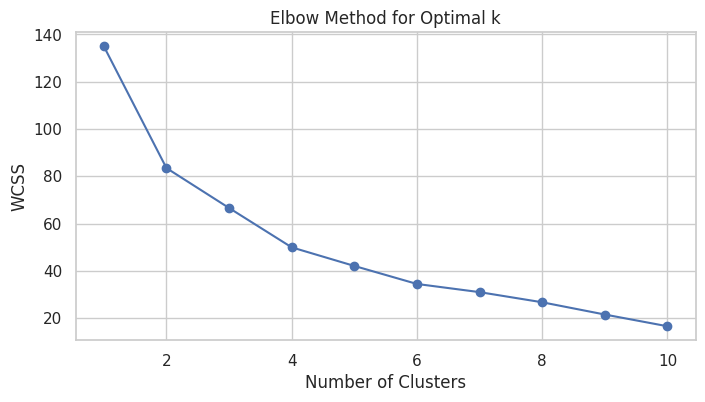

In [ ]:
# Plotting the Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Choose optimal clusters (e.g., k=3) and fit K-means
optimal_k = 3  # Modify this based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans_labels = kmeans.fit_predict(scaled_data)


In [ ]:
# Calculate Silhouette Score for K-means clustering
silhouette_kmeans = silhouette_score(scaled_data, kmeans_labels)
print(f'Silhouette Score for K-means with k={optimal_k}: {silhouette_kmeans}')

Silhouette Score for K-means with k=3: 0.3295965342261188


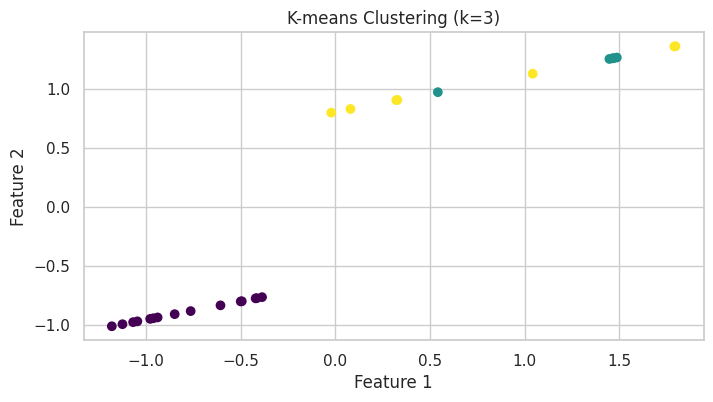

In [ ]:
# Plot K-means Clustering results
plt.figure(figsize=(8, 4))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title(f'K-means Clustering (k={optimal_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# **Hierarchical Clustering**

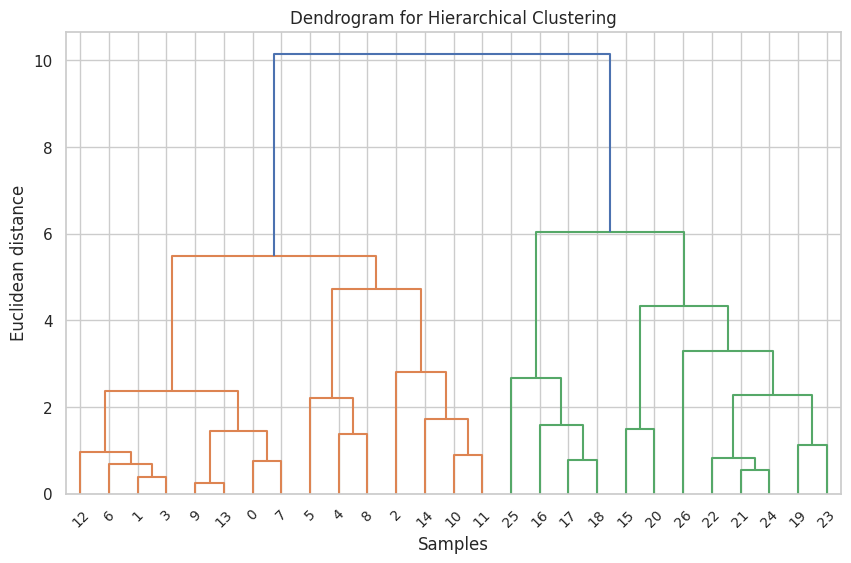

In [ ]:
# Plot dendrogram to find optimal clusters
plt.figure(figsize=(10, 6))
linked = linkage(scaled_data, method='ward')
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
# Set the optimal number of clusters (replace with the actual number if needed)
optimal_k = 3
# Fit Hierarchical Clustering using 'ward' linkage (no need for affinity)
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(scaled_data)
print(hierarchical_labels)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 2 1 1 1 1 1 1 2 1]


In [ ]:
# Calculate Silhouette Score for Hierarchical clustering
silhouette_hierarchical = silhouette_score(scaled_data, hierarchical_labels)
print(f'Silhouette Score for Hierarchical Clustering with k={optimal_k}: {silhouette_hierarchical}')

Silhouette Score for Hierarchical Clustering with k=3: 0.33637486480314216


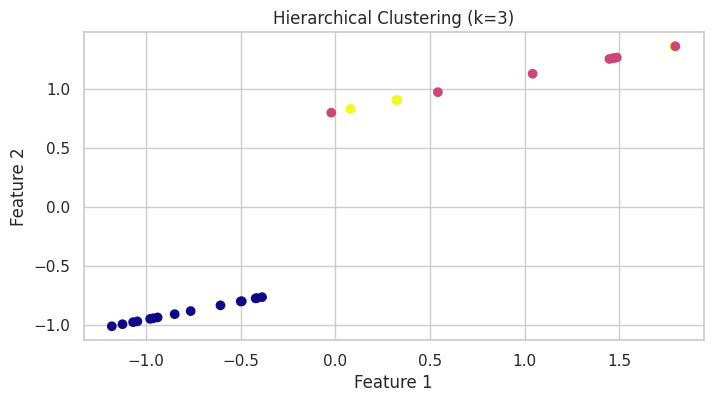

In [ ]:
# Plot Hierarchical Clustering results
plt.figure(figsize=(8, 4))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=hierarchical_labels, cmap='plasma')
plt.title(f'Hierarchical Clustering (k={optimal_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# **Principle Component Analysis**

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/indo_rct.csv")
data

,rownames,id,site,age,risk,gender,outcome,sod,pep,recpanc,...,sodsom,bsphinc,bstent,chole,pbmal,train,status,type,rx,bleed
0,1,1001,1_UM,26,2.0,1_female,1_yes,1_yes,0_no,1_yes,...,0_no,0_no,0_no,0_no,0_no,1_yes,1_outpatient,1_type 1,1_indomethacin,NaN
1,2,1002,1_UM,24,1.0,2_male,0_no,0_no,1_yes,0_no,...,0_no,1_yes,1_yes,1_yes,0_no,0_no,1_outpatient,0_no SOD,0_placebo,NaN
2,3,1003,1_UM,57,1.0,1_female,0_no,1_yes,0_no,0_no,...,0_no,0_no,0_no,0_no,0_no,0_no,1_outpatient,2_type 2,0_placebo,NaN
3,4,1004,1_UM,29,2.0,1_female,1_yes,1_yes,0_no,0_no,...,0_no,1_yes,0_no,1_yes,0_no,1_yes,1_outpatient,1_type 1,0_placebo,NaN
4,5,1005,1_UM,38,3.5,1_female,0_no,1_yes,1_yes,0_no,...,1_yes,1_yes,0_no,0_no,0_no,1_yes,0_inpatient,1_type 1,1_indomethacin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,598,3021,3_UK,39,2.0,1_female,0_no,0_no,0_no,1_yes,...,0_no,0_no,0_no,0_no,0_no,0_no,1_outpatient,0_no SOD,0_placebo,NaN
598,599,3022,3_UK,50,2.5,1_female,0_no,1_yes,0_no,1_yes,...,1_yes,1_yes,0_no,0_no,0_no,0_no,1_outpatient,2_type 2,0_placebo,NaN
599,600,4001,4_Case,29,1.5,1_female,0_no,0_no,0_no,0_no,...,0_no,1_yes,0_no,1_yes,0_no,1_yes,1_outpatient,1_type 1,0_placebo,NaN
600,601,4002,4_Case,40,1.5,1_female,0_no,1_yes,0_no,0_no,...,0_no,1_yes,0_no,0_no,0_no,1_yes,1_outpatient,1_type 1,1_indomethacin,NaN


In [ ]:
# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

Missing values in each column:
 rownames       0
id             0
site           0
age            0
risk           0
gender         0
outcome        0
sod            0
pep            0
recpanc        0
psphinc        0
precut         0
difcan         0
pneudil        0
amp            0
paninj         0
acinar         0
brush          0
asa81          0
asa325         0
asa            0
prophystent    0
therastent     0
pdstent        0
sodsom         0
bsphinc        0
bstent         0
chole          0
pbmal          0
train          0
status         0
type           0
rx             0
bleed          0
PCA1           0
PCA2           0
dtype: int64


In [ ]:
# Drop or fill missing values as necessary
data = data.dropna()
data

,rownames,id,site,age,risk,gender,outcome,sod,pep,recpanc,...,sodsom,bsphinc,bstent,chole,pbmal,train,status,type,rx,bleed
7,8,1008,1_UM,29,1.0,2_male,0_no,0_no,0_no,0_no,...,0_no,1_yes,0_no,1_yes,0_no,1_yes,1_outpatient,0_no SOD,1_indomethacin,2.0
17,18,1018,1_UM,46,1.5,1_female,0_no,0_no,0_no,0_no,...,0_no,0_no,0_no,0_no,0_no,1_yes,1_outpatient,0_no SOD,0_placebo,2.0
27,28,1028,1_UM,42,4.0,1_female,0_no,1_yes,1_yes,1_yes,...,1_yes,1_yes,0_no,0_no,0_no,1_yes,1_outpatient,1_type 1,1_indomethacin,1.0
31,32,1032,1_UM,51,1.5,1_female,1_yes,0_no,0_no,0_no,...,0_no,1_yes,1_yes,0_no,0_no,1_yes,1_outpatient,0_no SOD,0_placebo,2.0
43,44,1044,1_UM,71,2.0,1_female,0_no,1_yes,0_no,0_no,...,0_no,1_yes,0_no,0_no,0_no,0_no,1_outpatient,1_type 1,1_indomethacin,1.0
46,47,1047,1_UM,46,1.0,2_male,1_yes,0_no,0_no,0_no,...,0_no,1_yes,1_yes,0_no,0_no,1_yes,1_outpatient,0_no SOD,0_placebo,1.0
50,51,1051,1_UM,51,1.0,2_male,0_no,0_no,0_no,0_no,...,0_no,1_yes,1_yes,0_no,0_no,1_yes,1_outpatient,0_no SOD,0_placebo,2.0
66,67,1067,1_UM,34,1.5,2_male,0_no,0_no,1_yes,1_yes,...,0_no,0_no,0_no,0_no,0_no,1_yes,1_outpatient,0_no SOD,0_placebo,2.0
81,82,1082,1_UM,55,2.5,2_male,0_no,0_no,0_no,1_yes,...,0_no,0_no,0_no,0_no,0_no,1_yes,1_outpatient,0_no SOD,1_indomethacin,1.0
109,110,1110,1_UM,36,2.0,1_female,0_no,1_yes,0_no,0_no,...,0_no,1_yes,0_no,0_no,0_no,1_yes,1_outpatient,1_type 1,1_indomethacin,2.0


In [ ]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_num)
scaled_data

array([[-1.18202949, -1.0073671 , -1.23910957, -1.43185516,  0.8291562 ],
       [-1.12571258, -0.99005287,  0.080499  , -0.87956817,  0.8291562 ],
       [-1.06939566, -0.97273865, -0.22999714,  1.88186678, -1.20604538],
       [-1.0468689 , -0.96581296,  0.46861916, -0.87956817,  0.8291562 ],
       [-0.9792886 , -0.9450359 ,  2.02109983, -0.32728118, -1.20604538],
       [-0.96239352, -0.93984163,  0.080499  , -1.43185516, -1.20604538],
       [-0.93986676, -0.93291594,  0.46861916, -1.43185516,  0.8291562 ],
       [-0.84975969, -0.90521319, -0.8509894 , -0.87956817,  0.8291562 ],
       [-0.76528432, -0.87924185,  0.7791153 ,  0.22500581, -1.20604538],
       [-0.60759695, -0.83076203, -0.69574134, -0.32728118,  0.8291562 ],
       [-0.50059481, -0.79786501, -0.30762117,  1.32957979,  0.8291562 ],
       [-0.49496312, -0.79613359,  0.39099513,  1.88186678,  0.8291562 ],
       [-0.42175113, -0.77189367, -0.07474907, -0.87956817,  0.8291562 ],
       [-0.41611944, -0.77016225, -0.8

In [ ]:
# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)
pca_data

array([[-2.04028324, -1.30591638, -0.75942651, -0.46536301,  0.15368565],
       [-1.85565575, -0.3057796 , -0.17721483,  0.35701309,  0.13867555],
       [-0.38118916,  1.02012208,  1.81046911, -1.63543033,  0.01758672],
       [-1.80515036, -0.03715948, -0.16948954,  0.64145248,  0.09662619],
       [-1.15848533,  2.46016565, -0.0937828 ,  0.26810702, -0.15304273],
       [-1.44722441,  0.94574874, -1.24149733, -0.86797143, -0.19274109],
       [-1.90593424, -0.10420072, -0.70173454,  0.75812517,  0.0191445 ],
       [-1.58662938, -1.03833969, -0.30100701, -0.20109686,  0.01543703],
       [-0.73837001,  1.5593253 ,  0.28402456, -0.6052773 , -0.21726435],
       [-1.19918455, -0.92385002,  0.16246148, -0.11895365, -0.07695736],
       [-0.55341181, -0.52006321,  1.68791945, -0.09104848, -0.05481506],
       [-0.38628534,  0.03602614,  2.24069597,  0.29642915, -0.03891064],
       [-1.25772566, -0.55226749, -0.34715054,  0.4403962 , -0.19770158],
       [-1.03117911, -1.07353   ,  0.1

In [ ]:
# Explained variance for each principal component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance for each component:", explained_variance)

Explained Variance for each component: [0.43470028 0.28508093 0.16973139 0.10087969 0.00960771]


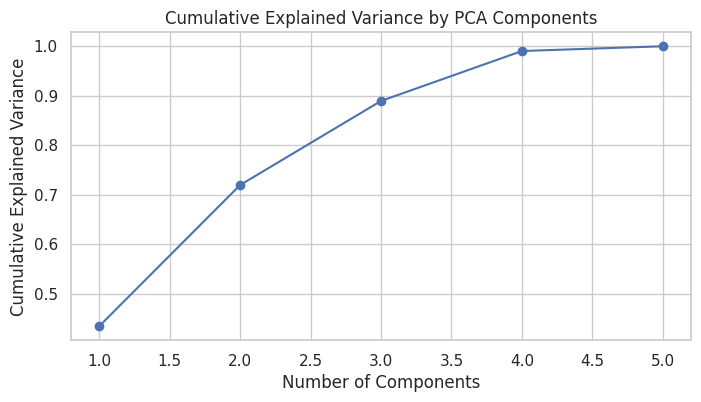

In [ ]:
# Plot cumulative explained variance
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
# Choose number of components to retain (e.g., enough to explain 90% variance)
n_components = sum(pca.explained_variance_ratio_.cumsum() <= 0.90) + 1
print(f'Number of components to explain 90% variance: {n_components}')

Number of components to explain 90% variance: 4


In [ ]:
# Apply PCA with chosen number of components
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)
pca_data


array([[-2.04028324, -1.30591638, -0.75942651, -0.46536301],
       [-1.85565575, -0.3057796 , -0.17721483,  0.35701309],
       [-0.38118916,  1.02012208,  1.81046911, -1.63543033],
       [-1.80515036, -0.03715948, -0.16948954,  0.64145248],
       [-1.15848533,  2.46016565, -0.0937828 ,  0.26810702],
       [-1.44722441,  0.94574874, -1.24149733, -0.86797143],
       [-1.90593424, -0.10420072, -0.70173454,  0.75812517],
       [-1.58662938, -1.03833969, -0.30100701, -0.20109686],
       [-0.73837001,  1.5593253 ,  0.28402456, -0.6052773 ],
       [-1.19918455, -0.92385002,  0.16246148, -0.11895365],
       [-0.55341181, -0.52006321,  1.68791945, -0.09104848],
       [-0.38628534,  0.03602614,  2.24069597,  0.29642915],
       [-1.25772566, -0.55226749, -0.34715054,  0.4403962 ],
       [-1.03117911, -1.07353   ,  0.1084808 , -0.17278069],
       [-0.8764286 ,  0.04533134,  0.70728944,  0.74738844],
       [ 0.53388528, -0.46322939, -1.41395899, -1.60981097],
       [ 0.84678078,  2.

<ipython-input-40-9fa95d6f26e7>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], palette='viridis')


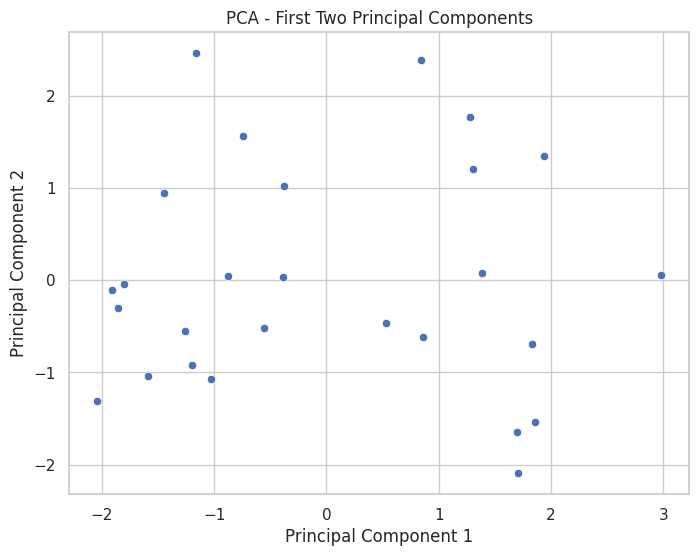

In [ ]:
# Visualize the first two principal components if possible
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], palette='viridis')
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# Display components (loadings) for each principal component
components_df = pd.DataFrame(data=pca.components_, columns=data.columns[:scaled_data.shape[1]], index=[f'PC{i+1}' for i in range(n_components)])
print("PCA Components (loadings):")
print(components_df)

PCA Components (loadings):
     rownames        id      site       age      risk
PC1  0.640118  0.646580 -0.040289  0.345017 -0.226990
PC2 -0.170338 -0.060375  0.730479  0.084790 -0.653109
PC3 -0.149727 -0.248937  0.065868  0.919874  0.255157
PC4  0.225177  0.138427  0.678476 -0.159382  0.666634


# **Model Development and Evaluation**

In [2]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    mean_squared_error,
    mean_absolute_error,
    log_loss,
    hamming_loss
)

# 1. Supervised Learning Example (Logistic Regression)
# Generate synthetic dataset
X, y = make_classification(n_samples=500, n_features=5, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)  # Predicted probabilities for log loss

# Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
hamming = hamming_loss(y_test, y_pred)
logloss = log_loss(y_test, y_pred_prob)

# Print results
print("Supervised Learning Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Hamming Loss: {hamming:.2f}")
print(f"Log Loss: {logloss:.2f}")

# 2. Reinforcement Learning Example (Q-Learning)
class GridEnvironment:
    def __init__(self, size=5):
        self.size = size
        self.state = (0, 0)  # Start position
        self.goal = (size - 1, size - 1)  # Goal position
        self.actions = ['up', 'down', 'left', 'right']

    def reset(self):
        self.state = (0, 0)
        return self.state

    def step(self, action):
        x, y = self.state
        if action == 'up' and x > 0:
            x -= 1
        elif action == 'down' and x < self.size - 1:
            x += 1
        elif action == 'left' and y > 0:
            y -= 1
        elif action == 'right' and y < self.size - 1:
            y += 1

        self.state = (x, y)
        reward = 1 if self.state == self.goal else -0.1
        done = self.state == self.goal
        return self.state, reward, done

# Initialize environment and Q-table
env = GridEnvironment(size=5)
q_table = np.zeros((env.size, env.size, len(env.actions)))
learning_rate = 0.1
discount_factor = 0.9
episodes = 1000

# Q-Learning algorithm
for episode in range(episodes):
    state = env.reset()
    done = False
    while not done:
        # Choose action
        action_idx = np.random.choice(len(env.actions))
        action = env.actions[action_idx]

        # Take action
        next_state, reward, done = env.step(action)

        # Update Q-value
        old_value = q_table[state[0], state[1], action_idx]
        next_max = np.max(q_table[next_state[0], next_state[1]])
        new_value = old_value + learning_rate * (reward + discount_factor * next_max - old_value)
        q_table[state[0], state[1], action_idx] = new_value

        state = next_state

# Output Results
print("\nLearned Q-Table from Reinforcement Learning:")
print(q_table)



Supervised Learning Metrics:
Accuracy: 0.89
Confusion Matrix:
[[46  7]
 [ 4 43]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        53
           1       0.86      0.91      0.89        47

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100

Root Mean Square Error (RMSE): 0.33
Mean Absolute Error (MAE): 0.11
Mean Squared Error (MSE): 0.11
Hamming Loss: 0.11
Log Loss: 0.26

Learned Q-Table from Reinforcement Learning:
[[[-0.13906558 -0.0434062  -0.13906558 -0.0434062 ]
  [-0.0434062   0.062882   -0.13906558  0.062882  ]
  [ 0.062882    0.18098    -0.0434062   0.18098   ]
  [ 0.18098     0.3122      0.062882    0.3122    ]
  [ 0.3122      0.458       0.18098     0.3122    ]]

 [[-0.13906558  0.062882   -0.0434062   0.062882  ]
  [-0.0434062   0.18098    -0.0434062   0.18098   ]
  [ 0.062882    0.3122 